# Modèle de prédiction, Forêts aléatoires

Forêts aléatoires (FA) ou Random Forests

## Section 1

On vérifie le PEP8 avec:

- https://www.pythonsheets.com/notes/python-typing.html
- https://stackoverflow.com/questions/26126853/verifying-pep8-in-ipython-notebook-code

Une fois les module sont installés avec

    pip install flake8 pycodestyle_magic
    
on ajoute une cellule temporaire avec

    %load_ext pycodestyle_magic
    %pycodestyle_on
    #%pycodestyle_off

On le lance avec la 1re ligne et on l'active ou non avec les lignes suivantes. On peut aussi travailler avec

    %flake8_on
    %flake8_off

Pour les modules scientifiques et la vérification du typage: https://github.com/wearepal/data-science-types et bien d'autres sources.

In [1]:
#%load_ext nb_black
#%load_ext pycodestyle_magic
#%pycodestyle_on
#%pycodestyle_off

from typing import List

### Fondements théoriques

- Les forêts aléatoires (FA) sont un algorithme d'apprentissage supervisé (X et y).
    - Les FA peuvent être utilisées à la fois pour la classification et la régression sur des ensembles de données comportant de nombreuses observations et features, avec des valeurs manquantes.
    - Les FA sont utiles lorsque nous devons obtenir un résultat précis tout en évitant le sur-entrainement ou overfitting.
- Les FA sont composées d'arbres de décision.
    - La composition d'arbres de décision ou de plusieurs algorithme est aussi appelée bagging ou méthode d'ensemble.
    - Les FA sont une sorte du "supra-algorithme" qui cumule des algorithmes. Si on reste au niveau de l'ensemble (sans descendre dans chaque algorithme, dans chaque arbre de décision), les FA gèrent un certains nombre d'arbres de décision.
    - **Il faut se référer à la compréhension d'un algorithme d'arbres de décision** pour explorer les formules mathématiques.
- Les FA créent des arbres de décision sur des échantillons de données (du jeu d'entrainement) sélectionnés au hasard. À ne pas confondre avec la scission au hasard des rangées du jeu de données en jeu pour l'entrainement (disons 80%) et un autre jeu pour les tests (disons 20%). Les FA font un tirage au hasard ou un rebrassage (d'où le mot aléatoire dans FA) du jeu d'entrainement à chaque arbre de décision.
    - Cette technique de tirage au hasard du jeu d'entrainement est connue sous le nom de bootstrap.
    - Les FA servent à brasser les jeu de données d'entrainement par inférence statistique pour créer de nouveaux scénarios avec chaque arbre de décision, comme on brasse des cartes pour changer la donne avant chaque distribution de cartes aux joueurs.
    - On peut imaginer que si des joueurs de cartes n'obtiennent pas les mêmes mains à chaque round, chaque round donneront un résultat différent (le même joueurs ne remportera pas exactement les mêmes plis). Il en est de même pour chaque arbre de décision.
    - Il en résulte d'arbres de décision différents qui ne feront pas exactement les mêmes prédictions ou feront des prédictions équivalentes, mais de façon différente (comme parvenir à la même destination, par des chemins différents).
- Les FA obtiennent une prédiction pour chaque arbre de décision.
- Les FA sélectionnent la meilleure solution:
    - dans le cas d'une regression, c'est le résultat moyen de tous les arbres;
    - dans le cas d'une classification, c'est un vote par arbre; chaque arbre donne un résultat; la majorité (de 1 ou 0 dans un cas binomial) l'emporte (ou de 1, 2, 3 ou plus dans un cas multinomial).

Sources:

- https://www.datacamp.com/tutorial/random-forests-classifier-python ; l'article vulgarise bien le fonctionnement aux sections The Random Forests Algorithm et How does the Algorithm Work?
- https://fr.wikipedia.org/wiki/For%C3%AAt_d%27arbres_d%C3%A9cisionnels ; l'article explique plus en détail le fonctionnement de l'algorithme et la technique du boostrap.
    - https://fr.wikipedia.org/wiki/Bootstrap_(statistiques) ; les techniques de bootstrap sont des méthodes d'inférence statistique basées sur la réplication multiple des données à partir du jeu de données, selon les techniques de rééchantillonnage. Cette méthode est basée sur des simulations stochastiques, comme les méthodes de Monte-Carlo et les méthodes numériques bayésiennes (échantillonneur de Gibbs, l'algorithme de Metropolis-Hastings).

### Domaine typique d’utilisation

Les FA ont une variété d'applications:

- Les moteurs de recommandation sur les sites marchands: une série de métriques sur le consommateur indique s'il est un bon client à qui proposer de nouveaux produits ou non.
- La sélection de features; il se trouve à la base de l'algorithme de Boruta, qui sélectionne les caractéristiques importantes dans un ensemble de données.
- Le classement des emprunteurs (analyse de crédit): une série de métriques sur l'emprunteur indique s'il remboursera ou s'il fera défaut de paiement.
- L'identification d'activités frauduleuses: une série de métriques sur un comportement indique une possible fraude ou non.
- La prédiction de maladies: une série de métriques tirées du bilan médical indique un risque de développer une maladie ou non (comme le diabète).

Sources: https://www.datacamp.com/tutorial/random-forests-classifier-python

Par exemple, en marketing, les entreprises cherchent à déterminer si un client, un utilisateur ou un abonné répondra favorablement à une campagne de marketing. La cible est 1 (oui) ou 0 (non). Le modèle prédictif cherche à prédire si le client "s'engagera" (1) ou non (0) en fonction d'un nombre d'indicateurs socio-économiques (statut marital, revenu personnel, conducteur, propriétaire ou locataire, etc.), mais aussi de moyens déployés par l'entreprise (publipostage, offre sur le site lorsque le client se logue, démarche directe d'agents, etc.).

Les FA permettent d'abord d'entrainer un modèle pour comprendre la relation entre la cible y ("l'engagement") et les features X, puis de mesurer les features les plus déterminants à expliquer "l'engagement" d'un client. Le modèle indique les facteurs de succès pour maximiser "l'engagement": cibler tel groupe socio-économique avec telle tactique. Ensuite, le modèle entrainé sert à faire des prédictions lors d'une autre campagne de marketing.

Source: https://towardsdatascience.com/marketing-analytics-customer-engagement-random-forest-style-7df06a390979

### Application par un jeu de données

On peut voir le jeu de donnée de l'exemple marketing plus haut. Le source des données est dans l'article (https://towardsdatascience.com/marketing-analytics-customer-engagement-random-forest-style-7df06a390979). Ces données montre un résultat complet d'une campagne de marketing.

In [2]:
import os
import numpy as np
import pandas as pd

data: pd.DataFrame \
    = pd.read_csv('data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

data.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# Le données montrent les indicateurs socio-économiques des prospects et
# les moyens déployés par l'entreprise, comme Sales Channel,
# durant la campagne pour convertir un prospect en client

# Tous ces features, sauf un, sont des facteurs explicatifs
# déterminant "l'engagement"
# Ce sont 
    # des catégories (comme Coverage ou Gender)
    # des données discrètes (comme Income)
    # des données continues (comme Customer Lifetime Value)
    # ainsi de suite...

# Le feature qui devient la cible est Response ("l'engagement")
# non ou oui à la campagne
data['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
# Pour alimenter le modèle des FA, les chaines de caractères
# devront être encodées en chiffres (discrètes)
# pour représenter des catégories
# comme
    # 0, 1
    # 0, 1, 2, 3, etc.
    # 1, 2, 3, etc.

# De même pour la cible

# Transformer la cible en chiffre
data['Engaged']: int = data['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Engaged'].unique()

array([0, 1], dtype=int64)

In [6]:
# Compter les occurrences
somme: int = data['Engaged'].count()
oui: int = data['Engaged'].loc[data['Engaged'] == 1].count()
non: int = data['Engaged'].loc[data['Engaged'] == 0].count()

somme, oui, non

(9134, 1308, 7826)

In [7]:
# Calculer le taux "d'engagement"
oui / somme

0.14320122618786948

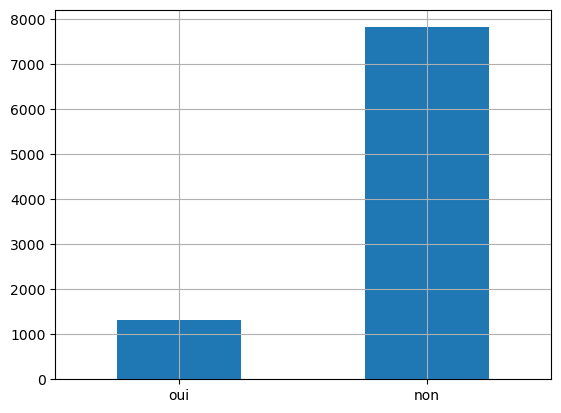

In [8]:
import matplotlib.pyplot as plt

# Visualiser les occurrences
pd.Series(np.array([oui, non])).plot.bar(rot=0)
plt.xticks([0, 1], ['oui', 'non'])
plt.grid()
plt.plot();

In [9]:
# Examiner les statistiques des occurences
data['Engaged'].describe()

count    9134.000000
mean        0.143201
std         0.350297
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Engaged, dtype: float64

In [10]:
# Voir le taux "d'engagement" avec la moyenne
data['Engaged'].mean()

0.14320122618786948

In [11]:
# Comment explique-t-on à ce taux?
# Comment peut-on augmenter ce taux?
# Ce sont les questions que le marketing se pose

# Le reste du travail consiste à encoder chaque feature en chiffre
# Ensuite, il faut entrainer le modèle prédictif

# La fin de l'article montre les résultats
# La justesse du modèle (accuracy) tourne autour de 87%
# Ce qui laisse un bonne marge d'erreur, car on est loin de 95% ou
# une justesse 19 fois sur 20
# On est plus prêt de 17 fois sur 20

# Cependant...
# On voit les features qui ont le plus d'impact sur "l'engagement"
# Les features déterminants indiquent "les bons clous
# sur lesquels frapper" pour maximuser "l'engagement" ou encore
# les erreurs, les fausses pistes à éviter
# Pour le marketing, les bonnes pistes à suivre sont plus importantes
# que la justesse des prévisions et
# pour ça les FA sont une bonne boussole

# Malgré sa marge d'erreur, 
# ce modèle (entrainé) servira à prédire le taux moyen "d'engagement" lors de
# futures campagnes de marketing similaire à celle qui a fourni
# les données pour entrainer le modèle prédictif

# Le modèle servira surtout à évaluer si on peut augmenter le taux en
# priorisant certains profils, certaines approches
# En simulant des cas (prévisions), on peut pratiquer divers scénarios (échantillons d'observations)
# qui donneront divers taux "d'engagement" (avec une même justesse, autour de 87%)
# Il s'agit de comprendre les scénarios qui donnent les gros taux
# Quels sont les facteurs socio-économiques et les tactiques marketing les plus porteurs
# Au final, il faut reproduire "sur le terrain" ce qui a été identifié "en laboratoire"

### Illustration de l’algorithme

Appliquer un exemple d'arbre de décision au modèle des FA.

Source: https://scikit-learn.org/stable/modules/tree.html#tree

L'exemple qui suit est sur simplification de l'exemple d'un article.

Source: https://www.datacamp.com/tutorial/random-forests-classifier-python

In [12]:
from sklearn.datasets import load_iris
import sklearn

# Charger les données
iris: sklearn.utils._bunch.Bunch \
    = load_iris()

X: np.ndarray
y: np.ndarray
X, y = iris.data, iris.target

In [13]:
# Évaluer les tailles des ndarray
X.shape, y.shape

((150, 4), (150,))

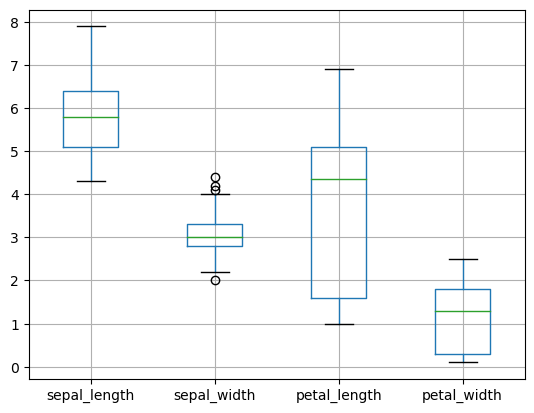

In [14]:
# Transformer le ndarray en DataFrame
X_df: pd.DataFrame \
    = pd.DataFrame(X, columns=['sepal_length', 'sepal_width',
                               'petal_length', 'petal_width'])
# Transformer le ndarray en Series
y_df: pd.Series = pd.Series(y)

# Visualiser la distribution des colonnes de X_df
# les features

X_df.boxplot()
plt.show();

In [15]:
# Il s'agit de données continues

# Voir y_df
# la cible
y_df.unique()

array([0, 1, 2])

In [16]:
# Il y a 3 catégories; c'est une cible multinomiale

# Ce sont des données simples
# Les X sont des données continues
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [17]:
# Les y sont des données discrètes
y[0:3]

array([0, 0, 0])

In [18]:
# L'algorithme doit réussir à classifier 3 catégories (y)
# avec 3 features entirement numérique (X)
# C'est une sorte de séparation linéaire
# des 3 groupes

from sklearn.ensemble import RandomForestClassifier

# Construire un modèle
clf: sklearn.ensemble \
    = RandomForestClassifier(n_estimators=10, random_state=0)

In [19]:
# Les FA utilisent 10 estimateurs ou arbres de décision
# C'est l'hyperparamètre principale des FA

# Il y aura 10 arbres de décision
# Chacun sera construit différemment

# Le random_state est une séquence aléatoire fixée
# Avec random_state=0 ou 10 ou 59,
# n'importe peut reproduire l'expérience avec le mêmes données
# pour obtenir les mêmes résultats
# Le hasard est donc contrôlé pour des fins de reproductibilité

# Entrainer l'algorithme du modèle
clf.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=0)

In [20]:
# Explorons les paramètres pour l'entrainement
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [21]:
# Ce sont les arguments de la fonction RandomForestClassifier()

# Explorons un attribut obtenu de l'entrainement
clf.feature_importances_

array([0.11896532, 0.0231668 , 0.36804744, 0.48982043])

In [22]:
# Ce sont les pourcentage d'importance des features 
np.array(X_df.columns)

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [23]:
# Donc, dans les features X
# petal_width a le plus d'importance
# suivi de petal_length
# pour déterminer 1 des 3 catégories de la cible y

# Lors d'un prévision, 
# il y a 10 résultats (identification d'une des 3 catégories)
# Les résultats peuvent diverger
# Chaque arbre est unique

# Avec une classification, chaque arbre, chaque résultat vaut 1 vote
# Le nombre de votes majoritaire l'emporte
# Si la majorité des arbres détermine la catégorie 0,
# les FA détermine la catégorie 0

# Avec quelques observations...
y_df.loc[25:27], X_df.loc[25:27]

(25    0
 26    0
 27    0
 dtype: int32,
     sepal_length  sepal_width  petal_length  petal_width
 25           5.0          3.0           1.6          0.2
 26           5.0          3.4           1.6          0.4
 27           5.2          3.5           1.5          0.2)

In [24]:
# ...ou...
y[25:28], X[25:28]

(array([0, 0, 0]),
 array([[5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2]]))

In [25]:
# ...faisons une prédiction
# avec X et valider avec y
clf.predict(X[25:28])

array([0, 0, 0])

In [26]:
# Correct!

# Donc, chacun des 10 arbres a fait 3 prévisions

# Certains arbres ont donné des 0, d'autres des 1 ou des 2,
# mais 0 est sorti majoritaire dans les 3 prévisions et
# les FA ont donné 0 trois fois au final

Sans jeu de test, la validation croisée permet de valider le jeu d'entrainement.

![](img/grid_search_workflow2.png)

Normalement, le jeu de données est divisé en 2 jeux: entrainement et test. Le jeu d'entrainement (X_train, y_train) sert à entrainer le modèle. Ensuite, le jeu de test (X_test, y_test) sert à le valider le modèle en comparant ce que le modèle entrainé prédit avec X_test (sans voir les réponses y_test) et les vraies réponses y_test. C'est ainsi qu'est calculée la matrice de confusion (les vrais et faux positifs ou 1, les vrais et faux négatifs, 0). Les faux résultats sont des erreurs. La matrice de confusion permet de calculer un tas de métriques dont le score de justesse.

Sans division du jeu, ou avec seulement un jeu d'entrainement, il y a moyen de valider l'entrainement par validation croisée (cross-validation). Cette dernière permet de brasser les cartes du jeu d'entrainement. Le tirage est refait un nombre de fois (disons 5 fois) pour recréer des scénarios de X_train, y_train, X_train_validation, y_train_validation. Ces jeux de données sont gardé temporairement en mémoire puisqu'ils changent à chaque scénario. La partie validation, un certain pourcentage du jeu de données, change à chaque scénario. Le modèle est exécuté pour être entrainé à chaque scénario. Puis, le modèle entrainé prédit avec X_train_validation (sans voir les réponses X_train_validation) et les vraies X_train_validation. La matrice de confusion est calculée et on passe au scénario suivant. À la fin, chaque matrice permet de calculer des métriques. Les scores montrent la justesse de chaque scénario et on en tire une moyenne de scénarios.

Source: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [27]:
# Évaluer le modèle
# par la méthode de la validation croisée
# sur des données d'entrainement

from sklearn.model_selection import cross_val_score

scores: np.ndarray = cross_val_score(clf, X, y, cv=5)

# Extraire les scores de 5 validations
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [28]:
# Extraire le score moyen
scores.mean().round(2)

0.95

In [29]:
# Selon le score moyen,
# le modèle arriverait à prédire avec justesse
# l'une des 3 catégories 19 fois sur 20
# (les 3 succès précédents font partie des 19 fois)

### Avantages, inconvénients et limites de l’algorithme

#### Avantages

1. Les FA sont considérées comme une méthode très précise et robuste en raison du nombre d'arbres de décision participant au processus.
1. Les FA ne souffrent pas du problème de surajustement ou overfitting (dont souffrent les autres algorithmes de classification comme la régression logistique et les arbres de décision).
    - La raison principale est que les FA prennent la moyenne de toutes les prédictions (des arbres de décision), ce qui annule les biais.
1. L'algorithme peut être utilisé à la fois dans les problèmes de classification et de régression.
1. Les forêts aléatoires peuvent également gérer les valeurs manquantes.
    - Il existe 2 façons de les gérer: utiliser des valeurs médianes pour remplacer les variables continues ou calculer la moyenne pondérée par la proximité des valeurs manquantes.
1. Les FA fournissent l'importance relative des features, ce qui aide à sélectionner les features les plus importants pour l'algorithme.

Source: https://www.datacamp.com/tutorial/random-forests-classifier-python ; l'article démontre un exemple application à la section Finding Important Features in Scikit-learn.

#### Désavantages

1. Les FA sont lentes à générer des prédictions, car elles comportent plusieurs arbres de décision.
    - Chaque fois que les FA font une prédiction, tous les arbres de la forêt doivent faire une prédiction avec les données d'entrainement, puis il faut effectuer un vote sur les résultats (1 vote par arbre de décision). C'est un processus long.
1. Le modèle est difficile à interpréter par rapport à un arbre de décision, où il est facile de suivre le chemin dans l'arbre qui conduit à la décision.

Source: https://www.datacamp.com/tutorial/random-forests-classifier-python

#### Limites

Les FA restent performantes avec des jeux de données modestes. À mesure que le nombre d'observations augmentent (des millions de lignes) les FA deviennent longs à entrainer. Il faut alors plus de capacité informatique (mémoire et puissance de calcul) pour traiter l'information. Les FA sont aussi plus difficiles à interpréter que les autres algorithmes de classification comme les arbres de décision. Enfin, dans le cas de régression, les FA montrent certaines faiblesses que les régressions peuvent contourner.

Sources:

- https://cnvrg.io/random-forest-regression/
- https://towardsdatascience.com/a-limitation-of-random-forest-regression-db8ed7419e9f

#### Hyperparamètre

L'hyperparamètre principale des FA est le nombre d'estimateurs ou le nombre d'arbres de décision. L'objectif est de trouver un modèle suffisamment précis, mais qui reste rapide. Au-delà d'un certain nombre d'estimateurs, le modèle n'améliore plus sa précision, mais le temps de calcul continue d'augmenter. Il faut trouver le nombre optimal d'estimateurs qui maximise la précision et minimise le temps de calcul.

Cela sera démontré plus loin alors que l'on cherche le nombre optimal d'estimateurs.

#### Données

Les FA sont moins sensibles à des données non-normalisées ou non-standardisées. Cela n'affecte pas autant leur performance quand on compare les résultats qu'entrainent un jeu de données normalisé/standardisé par rapport aux résultats que donnent un jeu de données non-normalisé/non-standardisé. Certains algorithmes, comme les réseaux de neurones et les régressions, sont très sensibles aux données non-normalisées ou non-standardisées.

Source: https://www.datasciencelearner.com/does-random-forest-need-normalization-complete-analysis/

Voici un comparatif avec des données non normalisées, puis normalisées, inspiré de l'article cité.

In [30]:
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Obtenir les données
data1: sklearn.utils \
    = fetch_california_housing()

X: np.ndarray = data1.data
y: np.ndarray = data1.target
y_round: np.ndarray = y.round()

In [31]:
# Entrainer le modèle et extraire la justesse
rfc: sklearn.ensemble \
    = RandomForestClassifier(random_state=20)

X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray
X_train, X_test, y_train, y_test = train_test_split(X, y_round,
                                                    test_size=0.20,
                                                    random_state=20)
rfc.fit(X_train, y_train)
y_pred: np.ndarray = rfc.predict(X_test)
non_norm: float = metrics.accuracy_score(y_test, y_pred)

In [32]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

# Obtenir les données
data2: sklearn.utils \
    = fetch_california_housing()

X: np.ndarray = data2.data
y: np.ndarray = data2.target
y_round: np.ndarray = y.round()

In [33]:
# Entrainer le modèle et extraire la justesse
rfc: sklearn.ensemble \
    = RandomForestClassifier(random_state=20)

X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray
X_train, X_test, y_train, y_test = train_test_split(X, y_round,
                                                    test_size=0.20,
                                                    random_state=20)
sc: sklearn.preprocessing \
    = MinMaxScaler()
X_train_norm: np.ndarray = sc.fit_transform(X_train)
X_test_norm: np.ndarray = sc.transform(X_test)
rfc.fit(X_train, y_train)
y_pred: np.ndarray = rfc.predict(X_test)
norm: float = metrics.accuracy_score(y_test, y_pred)

In [34]:
# Comparer la justesse des 2 approches
print(f"score non-normalisé: {round(non_norm, 4)} "
      f"\nvs. \nscore normalisé: {round(norm, 4)} "
      f"\n\nune différence de: {non_norm - norm}")

score non-normalisé: 0.7299 
vs. 
score normalisé: 0.7299 

une différence de: 0.0


In [35]:
# La différence est nulle

# Mais à des fins comparatives avec d'autres modèles plus sensibles aux données
# non-normalisées,
# il vaut mieux normaliser les données qui entre dans chacun des modèles de
# classification comparables
# aux FA

# L'algorithme des FA n'est donc pas avantagé

# C'est l'approche qui sera employée plus loins pour comparer les FA avec des
# modèles équivalents

S'il y a bien une chose que les FA règlent, c'est le problème du surapprentissage ou surajustement (dont souffrent les autres algorithmes de classification comme la régression logistique et les arbres de décision). Quant au sousapprentissage ou sousajustement, c'est un problème qui provient d'un manque d'observations. Il s'agit alors d'ajouter plus d'observations dans le jeu d'entrainement. Encore ici, une autre force des FA est de rééchantillonner les données d'entrainement à chaque estimation (chaque arbre de décision). Les FA sont un ensemble d'arbres de décision, mais chaque arbre calcule avec les observations du jeu d'entrainement dont l'ordre a été changé. C'est un rebrassage des cartes à chaque donne.

### Algorithmes alternatifs

- Régression logistique
- Arbre de décision
- Diverses méthodes d'ensemble et le bagging dont fait partie les FA et la combinaison du bagging et du boosting
    - Le boosting est l'utilisation du renforcement de certains arbres de décision dans l'ensemble d'arbres (les votes de chaque arbre ne sont plus égaux et les arbres avec les meilleurs résultats sont surpondérés)
- La combinaison de plusieurs algorithmes; la technique du vote dans les FA (1 vote par arbre) s'étend alors à tous les algorithmes (1 vote par algorithme)

Sciki-Learn (source: https://scikit-learn.org/stable/index.html) fournit:

- from sklearn.linear_model import LogisticRegression
- from sklearn.tree import DecisionTreeClassifier
- from sklearn.dummy import DummyClassifier
- from sklearn.ensemble import BaggingClassifier
- from sklearn.ensemble import AdaBoostClassifier
- from sklearn.ensemble import GradientBoostingClassifier
- from sklearn.ensemble import VotingClassifier

Il existe aussi XGBoost (source: https://xgboost.readthedocs.io/en/stable/) (XGBoost veut dire Extreme Gradient Boosting).

## Section 2

### Définition du problème

Problème à résoudre: construire un modèle qui permet de prédire si un répondant est ou sera obèse ou non à partir de métriques sur son hygiène de vie.

C'est une classification binomiale avec un modèle supervisé (X et y).

Il faut d'abord entrainer le modèle avec des données de répondants; des métriques sur leur hygiène de vie (les feature X du modèle supervisé). On connait le poids des répondants: leur Indice de Masse Corporelle. Cet indice permet de catégoriser leur niveau de poids. D'abord en 7 catégories. Puis ramené à 2 catégories: 0, non obèse ou 1, obèse. C'est la cible (y) du modèle supervisé.

### Acquisition des données

#### Données d'origine

Le jeu de données est disponible sur diverses plateformes:

- Kaggle: https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/notebook
- Github: https://github.com/zeglam/Obesity_Levels_Analysis

In [36]:
import os
import numpy as np
import pandas as pd
from typing import List
from sklearn.preprocessing import OneHotEncoder

# Facultatif
# Déterminer le répertoire de travail
# os.chdir('C:\Users\Usager\Documents\Ahuntsic\__420-318-AH \
# INTELLIGENCE ARTIFICIELLE III\Projet1')

# Importer les données du fichier CSV
data: pd.DataFrame \
    = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv',
                  sep=",",
                  decimal=',')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Préparation et nettoyage des données

Il n'y a pas de valeurs manquantes, abérrantes ou autres anomalies à nettoyer.

Par contre, le jeu de données compte plusieurs colonnes de données non-numériques. Ces colonnes contiennent des types Pandas `object` (similaires au type Python `str`). Ce sont des données qualitatives ou catégoriques. Les autres colonnes du jeu de données sont numériques.
  
D'abord, il s'agit de transformer les types `object` en types `category` et de standardiser les catégories. Par exemple, des features binomiaux de catégories binaires (`femme`-`homme` ou `non`-`oui`), des features multinomiaux de catégories ordinales (`jamais`, `parfois`, `souvent`) et des features faits de tranches de données numériques continues (`moins 1 litre`, `1–2 litres`, `plus 2 litres`).

Les features faits de tranches de données numériques continues doivent être ordonnées (`moins 1 litre` < `1–2 litres` < `plus 2 litres`). Les catégories non-numériques, qui ne sont pas des tranches de données numériques continues, ont tendance à suivre un ordre alphanumérique. Les catégories ordinales (`jamais` < `parfois` < `souvent`) doivent être ordonnées (comme une séquence numérique) pour rester logiques.  Les catégories binaires  (`femme`-`homme` ou `non`-`oui`)  ne sont pas ordonnées.

Les données catégoriques permettent d'explorer les données, mais elles ne peuvent pas alimenter un algorithme de ML.

Consulter: https://machinelearningknowledge.ai/categorical-data-encoding-with-sklearn-labelencoder-and-onehotencoder/

Il faut donc créer un équivalent numérique (discret ou entier) dans une autre colonne. Par exemple, `femme`-`homme` devient `0`-`1`, `jamais`, `parfois`, `souvent` deviennent `0`, `1`, `2` et  `moins 1 litre`, `1–2 litres`, `plus 2 litres` deviennent `1`, `2`, `3`.

Consulter: https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers

Parfois, il n'y a pas d'ordre dans le feature, mais plusieurs catégories non ordinales ou des données qualificatives (`Automobile`, `Motorbike`, `Bike`, etc). Il faut encoder chaque catégorie dans de nouvelle colonnes de données binaires numériques ( `0`-`1`). 5 qualitatifs donnent 5 nouvelles colonnes. À chaque observation, une seule des 5 colonnes montre `1` dans la colonne du transport désigné et les autres montrent `0`.

Consulter: https://datagy.io/sklearn-random-forests

Le type `category` est un compromis entre le type `object` et un type numérique, car il permet de faire des calculs tout en affichant des chaines de caractères.

Consulter:

- https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#differences-to-r-s-factor
- https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

Les calculs statistiques (`mean()`, `std()`, etc., `describe()`), les tris (`sort_values()`), les opérateurs de comparaison (`==`, `>`, etc.) et les masques d'extraction (`loc[masque]`) qui les utilisent, les méthodes de modélisation comme `groupby()` fonctionnent sur les données catégoriques.

Certains graphiques fonctionnent très bien avec les données catégoriques. Le module Seaborn est particulièrement bien pourvu pour visualiser des données catégoriques.

Le fichier CSV d'origine est traité et enrichi. Le résultat est sauvegardé dans un format Pickle (binaire) qui permet de préserver le `DataFrame` et ses types.

Consulter: 

- https://datascienceparichay.com/article/save-pandas-dataframe-to-a-pickle-file/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html

### Analyse et exploration des données

#### Données nettoyées

In [37]:
data: pd.DataFrame \
    = pd.read_pickle('data/ObesityDataSet_raw_and_data_sinthetic2.pkl')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   2111 non-null   category
 1   Gender_n                 2111 non-null   int8    
 2   Age                      2111 non-null   float16 
 3   Height                   2111 non-null   float16 
 4   Weight                   2111 non-null   float16 
 5   FHWO                     2111 non-null   category
 6   FHWO_n                   2111 non-null   int8    
 7   FAVC                     2111 non-null   category
 8   FAVC_n                   2111 non-null   int8    
 9   FCVC                     2111 non-null   category
 10  FCVC_n                   2111 non-null   int8    
 11  NCP                      2111 non-null   category
 12  NCP_n                    2111 non-null   int8    
 13  CAEC                     2111 non-null   category
 14  CAEC_n  

#### Description des données

Note: les features avec le suffixe _n sont les équivalents numériques des features d'origine.

- Gender: Genre;
    - ['Female', 'Male'] équivaut  [0, 1]
- Age: Âge;
    - continue
- Height: Taille, en mètres;
    - continue
- Weight: Masse, en kilogrammes;
    - continue
- FHWO: Famille souffrant ou ayant souffert d'obésité;
    - ['no', 'yes'] équivaut à [0, 1]
- FAVC: Haute fréquence de consommation d'aliments hypercaloriques;
    - ['no', 'yes'] équivaut à [0, 1]
- FCVC: Consommation de légumes avec les repas;
    - ['never', 'sometimes', 'always'] équivaut à [0, 1, 2]
- NCP: Nombre quotidien de repas;
    - ['1', '2', '3', '4+'] équivaut à [1, 2, 3, 4]
- CAEC: Collations entre les repas; 
    - ['no', 'Sometimes', 'Frequently', 'Always'] équivaut à [0, 1, 2, 3]
- SMOKE: Tabagisme;
    - ['no', 'yes'] équivaut à [0, 1]
- CH2O: Consommation quotidienne d'eau;
    - ['less_than_a_liter', '1–2_liters', 'more_than_2_liters'] équivaut à [1, 2, 3]
- SCC: Surveillance de sa consommation calorique;
    - ['no', 'yes'] équivaut à [0, 1]
- FAF: Fréquence d'activités physiques;
    - ['none', '1_to_2_days', '2_to_4_days', '4_to_5_days'] équivaut à [0, 1, 2, 3]
- TUE: Temps quotidien d'utilisation d'appareils (mobile, jeux vidéo, TV, ordinateur, etc.);
    - ['0–2_hours', '3–5_hours', 'more_than_5_hours'] équivaut à [1, 2, 3]
- CALC: Consommation d'alcool;
    - ['no', 'Sometimes', 'Frequently', 'Always'] équivaut à [0, 1, 2, 3]
- MTRANS: Transport le plus utilisé;
    - ['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking'] équivaut aux features
    - Automobile_n
    - Motorbike_n
    - Bike_n
    - Public_Transportation_n
    - Walking_n, tous faits de [0, 1]
- NObeyesdad: Niveau d'obésité;
    - ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] équivaut à [1, 2, 3, 4, 5, 6, 7]
- NObeyesdad2: Niveau d'obésité;
    - ['not_obese', 'obese'] équivaut à [0, 1]
    
#### Exploration des données

In [38]:
# Vérifier le début des colonnes pour voir quelques données
data[['Gender', 'Gender_n', 'Age', 'Height', 'Weight', 'FHWO',
      'FHWO_n', 'FAVC', 'FAVC_n', 'FCVC', 'FCVC_n', 'NCP',
      'NCP_n', 'CAEC', 'CAEC_n']].head(3)

,Gender,Gender_n,Age,Height,Weight,FHWO,FHWO_n,FAVC,FAVC_n,FCVC,FCVC_n,NCP,NCP_n,CAEC,CAEC_n
0,Female,0,21.0,1.620117,64.0,yes,1,no,0,sometimes,1,3,3,Sometimes,1
1,Female,0,21.0,1.519531,56.0,yes,1,no,0,always,2,3,3,Sometimes,1
2,Male,1,23.0,1.799805,77.0,yes,1,no,0,sometimes,1,3,3,Sometimes,1


In [39]:
data[['SMOKE', 'SMOKE_n', 'CH2O', 'CH2O_n', 'SCC', 'SCC_n',
      'FAF', 'FAF_n', 'TUE', 'TUE_n', 'CALC', 'CALC_n']].head(3)

,SMOKE,SMOKE_n,CH2O,CH2O_n,SCC,SCC_n,FAF,FAF_n,TUE,TUE_n,CALC,CALC_n
0,no,0,1–2_liters,2,no,0,none,0,3–5_hours,2,no,0
1,yes,1,more_than_2_liters,3,yes,1,4_to_5_days,3,0–2_hours,1,Sometimes,1
2,no,0,1–2_liters,2,no,0,2_to_4_days,2,3–5_hours,2,Frequently,2


In [40]:
data[['MTRANS',
      'Automobile_n', 'Motorbike_n', 'Bike_n',
      'Public_Transportation_n', 'Walking_n']].head(3)

,MTRANS,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n
0,Public_Transportation,0,0,0,1,0
1,Public_Transportation,0,0,0,1,0
2,Public_Transportation,0,0,0,1,0


In [41]:
data[['NObeyesdad', 'NObeyesdad_n', 'NObeyesdad2', 'NObeyesdad_n2']].head(3)

,NObeyesdad,NObeyesdad_n,NObeyesdad2,NObeyesdad_n2
0,Normal_Weight,2,not_obese,0
1,Normal_Weight,2,not_obese,0
2,Normal_Weight,2,not_obese,0


In [42]:
# Vérifier s'il y a des valeurs manquantes, par colonne
data.isnull().sum()

Gender                     0
Gender_n                   0
Age                        0
Height                     0
Weight                     0
FHWO                       0
FHWO_n                     0
FAVC                       0
FAVC_n                     0
FCVC                       0
FCVC_n                     0
NCP                        0
NCP_n                      0
CAEC                       0
CAEC_n                     0
SMOKE                      0
SMOKE_n                    0
CH2O                       0
CH2O_n                     0
SCC                        0
SCC_n                      0
FAF                        0
FAF_n                      0
TUE                        0
TUE_n                      0
CALC                       0
CALC_n                     0
MTRANS                     0
Automobile_n               0
Motorbike_n                0
Bike_n                     0
Public_Transportation_n    0
Walking_n                  0
NObeyesdad                 0
NObeyesdad_n  

In [43]:
# Il n'y a pas de valeurs manquantes

# La cible potentielle (y) sera les colonnes
# sur les catégories de poids
# en 7 catégories
data['NObeyesdad'].unique()

['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']

In [44]:
data['NObeyesdad_n'].unique()

array([2, 3, 4, 5, 1, 6, 7], dtype=int8)

In [45]:
# Ou en 2 catégories
data['NObeyesdad2'].unique()

['not_obese', 'obese']
Categories (2, object): ['not_obese', 'obese']

In [46]:
data['NObeyesdad_n2'].unique()

array([0, 1], dtype=int8)

In [47]:
# Ce qui détermine les 7 catégories de NObeyesdad et NObeyesdad_n
# est le feature Weight et
# plus particulièrement l'indice de masse corporelle (IMC)

# Catégories de NObeyesdad: 'Insufficient_Weight', 'Normal_Weight',
# 'Overweight_Level_I', 'Overweight_Level_II',
# 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'

# Catégories de NObeyesdad2: 'not_obese', 'obese'

# not_obese comporte
# 'Insufficient_Weight', 'Normal_Weight',
# 'Overweight_Level_I', 'Overweight_Level_II',

# obese comporte
# 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'

# Calculer cet IMC
# et en faire une nouvelle colonne numérique: BMI
data['BMI']: float = data['Weight'] / (data['Height'] ** 2)

# Comparer
data[['NObeyesdad', 'NObeyesdad_n',
      'NObeyesdad2', 'NObeyesdad_n2', 'BMI']].head(10)

,NObeyesdad,NObeyesdad_n,NObeyesdad2,NObeyesdad_n2,BMI
0,Normal_Weight,2,not_obese,0,24.375000
1,Normal_Weight,2,not_obese,0,24.250000
2,Normal_Weight,2,not_obese,0,23.765625
3,Overweight_Level_I,3,not_obese,0,26.843750
4,Overweight_Level_II,4,not_obese,0,28.328125
5,Normal_Weight,2,not_obese,0,20.187500
6,Normal_Weight,2,not_obese,0,24.437500
7,Normal_Weight,2,not_obese,0,19.718750
8,Normal_Weight,2,not_obese,0,20.187500
9,Normal_Weight,2,not_obese,0,23.000000


### Corrélation et équilibre des données

#### Corrélation

In [48]:
# Déterminer s'il faut supprimer certains feature
# parce qu'ils sont trop corrélés avec le feature principal:
# NObeyesdad (obésité)

# Sources:
# https://www.datacamp.com/tutorial/feature-selection-python
# et les liens dans l'article
# Intelligence artificielle vulgarisée, ENI, chap. 5, 6

# Extraire la matrice de corrélation
# qui ne marche que sur les features numériques
matrice: pd.DataFrame \
    = data.corr()
matrice.round(1)

,Gender_n,Age,Height,Weight,FHWO_n,FAVC_n,FCVC_n,NCP_n,CAEC_n,SMOKE_n,...,TUE_n,CALC_n,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n,NObeyesdad_n,NObeyesdad_n2,BMI
Gender_n,1.0,0.0,0.6,0.2,0.1,0.1,-0.3,0.1,-0.1,0.0,...,0.0,-0.0,0.1,0.0,0.1,-0.2,0.0,-0.0,-0.0,-0.1
Age,0.0,1.0,-0.0,0.2,0.2,0.1,0.0,-0.0,-0.1,0.1,...,-0.3,0.0,0.6,0.0,0.0,-0.6,-0.1,0.3,0.2,0.2
Height,0.6,-0.0,1.0,0.5,0.2,0.2,-0.1,0.2,-0.0,0.1,...,0.1,0.1,0.1,-0.0,0.0,-0.1,0.0,0.1,0.1,0.1
Weight,0.2,0.2,0.5,1.0,0.5,0.3,0.2,0.1,-0.3,0.0,...,-0.0,0.2,-0.0,-0.0,-0.0,0.1,-0.1,0.9,0.8,0.9
FHWO_n,0.1,0.2,0.2,0.5,1.0,0.2,0.0,0.1,-0.2,0.0,...,0.0,-0.0,0.1,-0.1,-0.0,-0.1,-0.1,0.5,0.4,0.5
FAVC_n,0.1,0.1,0.2,0.3,0.2,1.0,-0.0,-0.0,-0.2,-0.1,...,0.1,0.1,0.1,-0.0,-0.1,0.0,-0.2,0.2,0.3,0.2
FCVC_n,-0.3,0.0,-0.1,0.2,0.0,-0.0,1.0,0.0,0.1,0.0,...,-0.1,0.0,-0.1,-0.0,-0.0,0.1,0.0,0.2,0.1,0.2
NCP_n,0.1,-0.0,0.2,0.1,0.1,-0.0,0.0,1.0,0.1,0.0,...,0.0,0.1,0.1,0.0,0.0,-0.1,0.0,0.0,0.0,0.0
CAEC_n,-0.1,-0.1,-0.0,-0.3,-0.2,-0.2,0.1,0.1,1.0,0.1,...,0.0,-0.0,-0.0,0.1,0.0,-0.0,0.1,-0.3,-0.2,-0.3
SMOKE_n,0.0,0.1,0.1,0.0,0.0,-0.1,0.0,0.0,0.1,1.0,...,0.0,0.1,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0


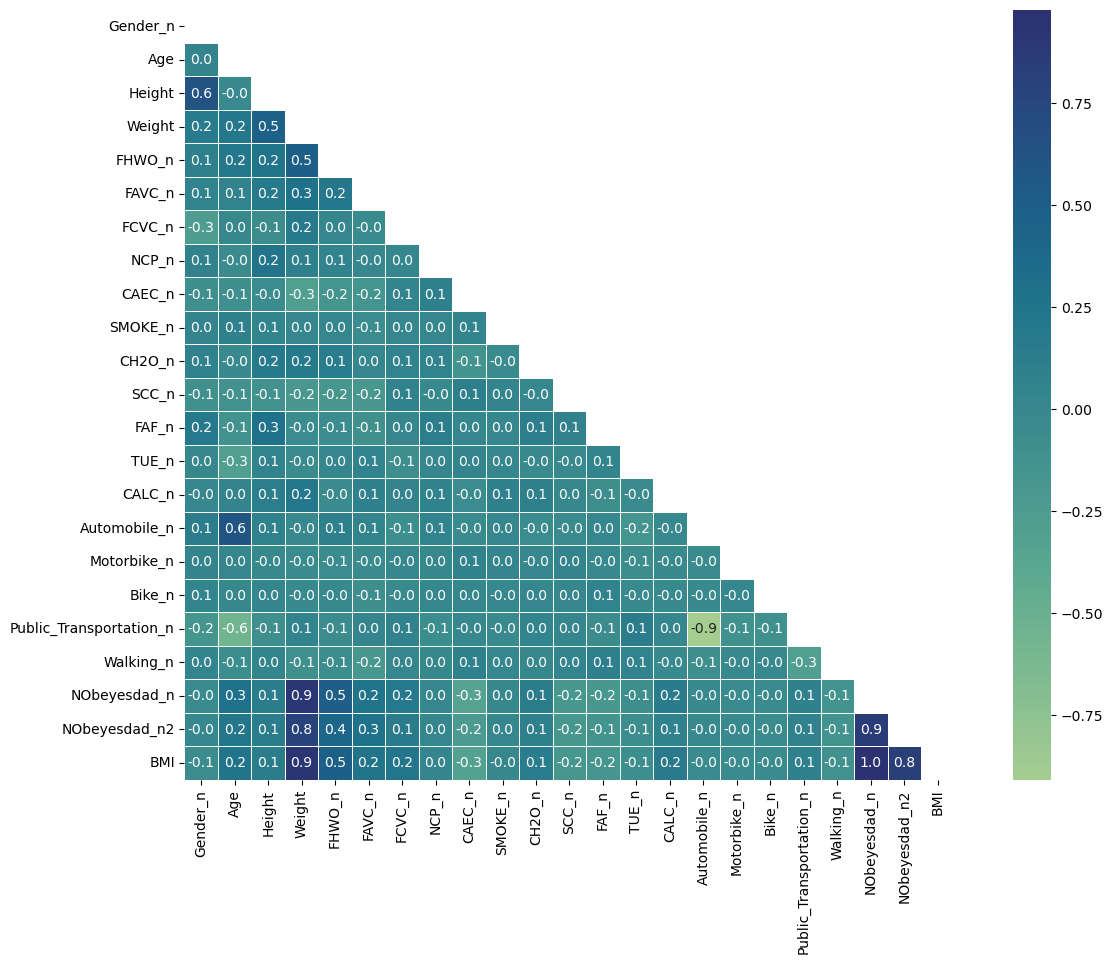

In [49]:
import seaborn as sns

# Obtenir le triangle de la matrice de corrélation
triangle: np.ndarray \
    = np.triu(matrice)

# Extraire le triangle de corrélation (visuellement)
# utiliser le triangle comme masque
plt.figure(figsize=(15, 10))
sns.heatmap(matrice, square=True, annot=True, fmt=".1f",
            linewidth=.5, cmap="crest", mask=triangle)
plt.show();

In [50]:
# On regarde les tons foncés
# Si on évite les corrélations entre les colonnes NObeyesdad (obésité),
# On remarque des carrés foncés où se croisent
# NObeyesdad et Weight
# NObeyesdad et BMI

# Catégories de NObeyesdad: 'Insufficient_Weight', 'Normal_Weight',
# 'Overweight_Level_I', 'Overweight_Level_II',
# 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'

# Catégories de NObeyesdad2: 'not_obese', 'obese'

# Le poids et l'IMC explique l'obésité ou la catégorie de poids d'une personne

# Fait intéressant: la corrélation entre Age et Automobile_n
# L'âge induirait à utiliser la voiture?

# Sachant que Weight et BMI sont fortement corrélés avec NObeyesdad (obésité)
# On les supprime pour s'assurer que le modèle s'appuiera
# sur les autres features

# Weight et BMI créent un biais qui
# renforce faussement la justesse d'un modèle
# C'est un biais de colinéarité ou de multicolinearité
# Consulter:
# https://datascience.eu/fr/mathematiques-et-statistiques/multicollinearite/

# Supprimer
data2: pd.DataFrame \
    = data.drop(labels=['Weight', 'BMI'], axis=1)
data2.columns.values

array(['Gender', 'Gender_n', 'Age', 'Height', 'FHWO', 'FHWO_n', 'FAVC',
       'FAVC_n', 'FCVC', 'FCVC_n', 'NCP', 'NCP_n', 'CAEC', 'CAEC_n',
       'SMOKE', 'SMOKE_n', 'CH2O', 'CH2O_n', 'SCC', 'SCC_n', 'FAF',
       'FAF_n', 'TUE', 'TUE_n', 'CALC', 'CALC_n', 'MTRANS',
       'Automobile_n', 'Motorbike_n', 'Bike_n', 'Public_Transportation_n',
       'Walking_n', 'NObeyesdad', 'NObeyesdad_n', 'NObeyesdad2',
       'NObeyesdad_n2'], dtype=object)

#### Équilibre avec les statistiques descriptives

In [51]:
# Extraire les statistiques des features numériques
# avec des données catégoriques rendues numériques
data2.describe(include=['int8', 'float16']).round(1)

,Gender_n,Age,Height,FHWO_n,FAVC_n,FCVC_n,NCP_n,CAEC_n,SMOKE_n,CH2O_n,...,FAF_n,TUE_n,CALC_n,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n,NObeyesdad_n,NObeyesdad_n2
count,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,...,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0,2111.0
mean,0.5,24.3,1.7,0.8,0.9,1.4,2.7,1.1,0.0,2.0,...,1.0,1.7,0.7,0.2,0.0,0.0,0.7,0.0,4.1,0.5
std,0.5,6.3,0.1,0.4,0.3,0.6,0.8,0.5,0.1,0.7,...,0.9,0.7,0.5,0.4,0.1,0.1,0.4,0.2,2.0,0.5
min,0.0,14.0,1.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,0.0,20.0,1.6,1.0,1.0,1.0,3.0,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
50%,1.0,22.8,1.7,1.0,1.0,1.0,3.0,1.0,0.0,2.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
75%,1.0,26.0,1.8,1.0,1.0,2.0,3.0,1.0,0.0,2.0,...,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0
max,1.0,61.0,2.0,1.0,1.0,2.0,4.0,3.0,1.0,3.0,...,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0


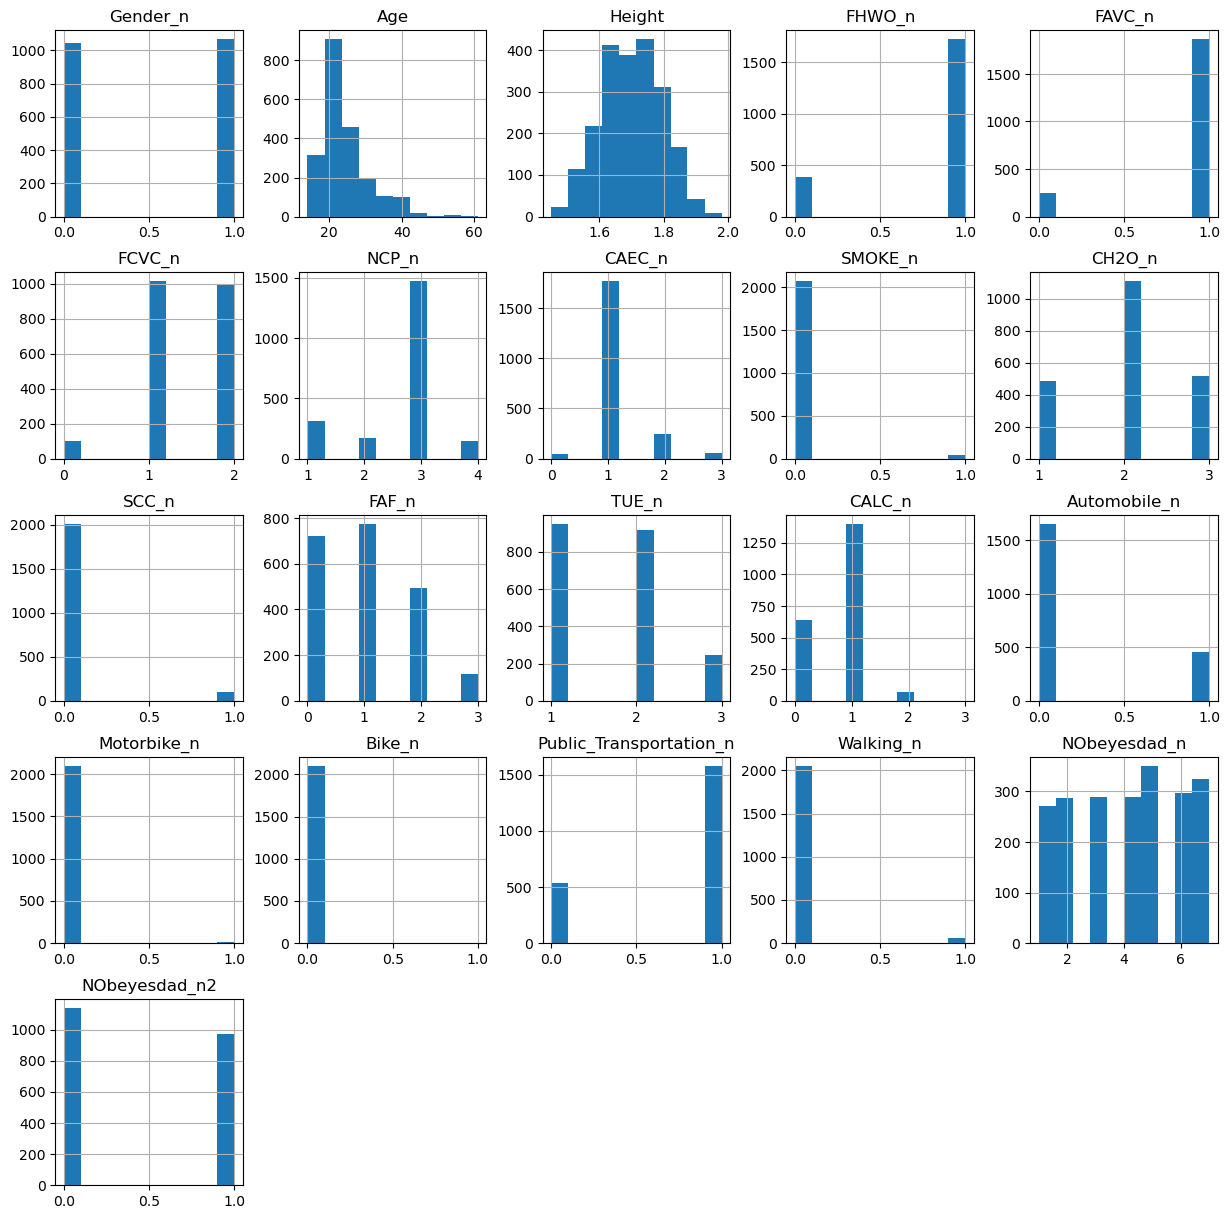

In [52]:
# Difficile d'analyser autant de résultats...

# Afficher les histogrammes des features numériques
data2.hist(figsize=(15, 15))
plt.show();

In [53]:
# Il n'y a pas de valeurs extrêmes
# La majorité des features sont des catégories
# qui ont été numérisée à 0, 1, 2... parfois jusqu'à 7 (maximum)
# Il n'y a pas de valeurs négatives (qui seraient insensées)

# Les features Age et Height n'ont pas de valeurs négatives
# ni de valeurs extrêmes (qui seraient insensées)

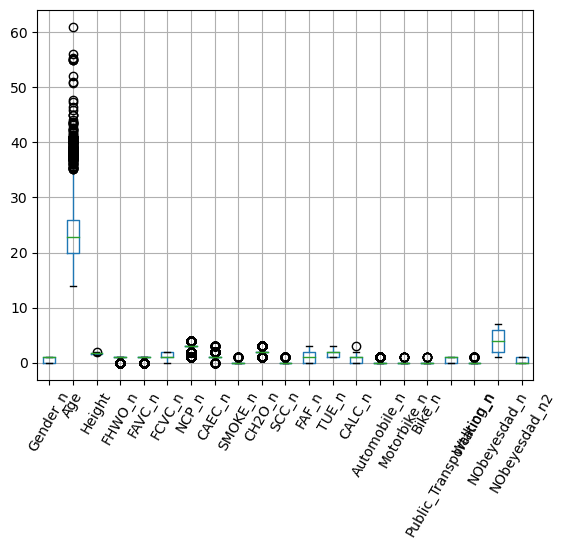

In [54]:
# Afficher les boites des features numériques
data2.boxplot(rot=60)
plt.show();

[]

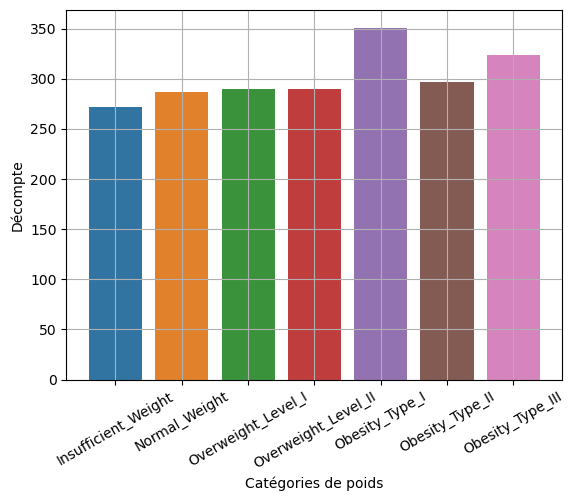

In [55]:
# Cette dernière vue montre qu'il n'y a pas de valeurs extrêmes
# ni de valeurs négatives (qui seraient insensées)

# Par contre, les cercles illustrent des outliers
# selon la formule de Tukey
# À la lumière des valeurs observées, il faut considérer ces "outliers"
# avec un grain de sel

# De retour aux histogrammes,
# les features qui ont été rendues numériques ne suivent pas la loi normale
# Ce sont des distributions plutôt uniformes
# parce que ce sont des catégories

# Seuls Age et, surtout, Height sont des distributions normales
# Ce sont des données numériques discrètes

# Dans les données catégoriques, à voir la matrice des histogrammes
# chaque catégorie n'est pas équilibrée

# Gender et les colonnes NObeyesdad montrent des classes presque égales

# Explorer le nombre de répondants par catégorie de poids
# Seaborn fournit des graphiques pour les données catégoriques
# Consulter:
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(data=data2, x='NObeyesdad')
plt.xticks(rotation=30)
plt.xlabel("Catégories de poids")
plt.ylabel("Décompte")
plt.grid()
plt.plot()

[]

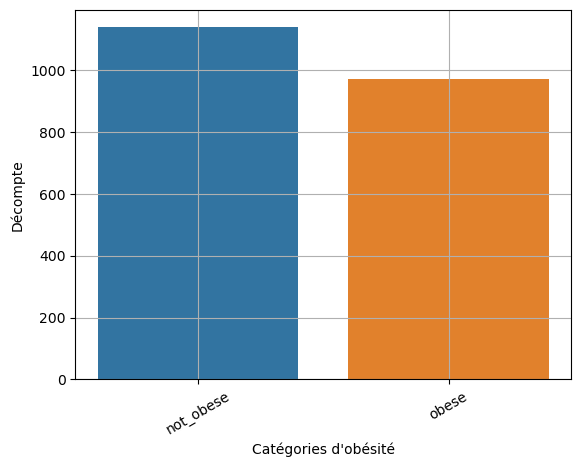

In [56]:
# Explorer le nombre de répondants par catégorie de poids
sns.countplot(data=data2, x='NObeyesdad2')
plt.xticks(rotation=30)
plt.xlabel("Catégories d'obésité")
plt.ylabel("Décompte")
plt.grid()
plt.plot()

In [57]:
# En terme de nombre de répondants,
# aucune des catégories de poids n'est
# largement supérieure à une autre

# Ce qui donne une quantité équilibrée d'observations par catégorie
# pour entrainer un modèle de classification

# Les autres features montrent des classes inégales
# Par exemple, il y a un net déséquilibre dans SMOKE (fumeur ou non-fumeur)

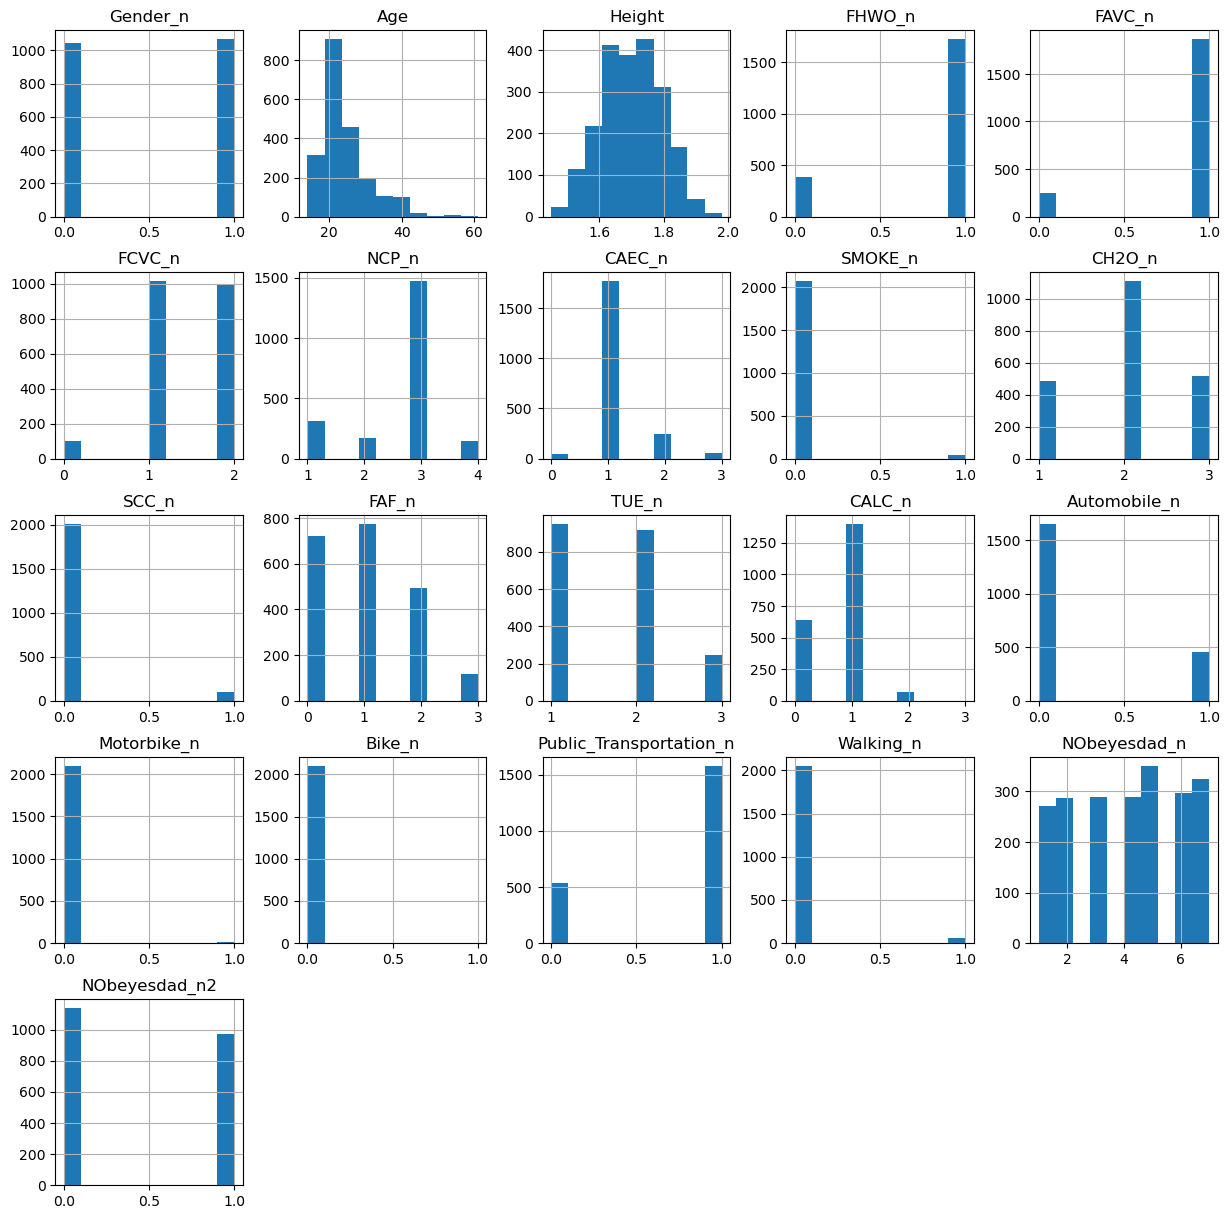

In [58]:
data2.hist(figsize=(15, 15))
plt.show();

In [59]:
# Il faudra un meilleur échantillon et plus d'observations pour arriver à
# un meilleur équilibre des classes ou de chaque catégorie dans chaque features

# Extraire les statistiques des données catégoriques
data2.describe(include='category')

,Gender,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,NObeyesdad2
count,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,3,4,4,2,3,2,4,3,4,7,2
top,Male,yes,yes,sometimes,3,Sometimes,no,1–2_liters,no,1_to_2_days,0–2_hours,Sometimes,Obesity_Type_I,not_obese
freq,1068,1726,1866,1013,1470,1765,2067,1110,2015,776,952,1401,351,1139


In [60]:
# Les statistiques montrent le nombre de catégories par feature catégoriques
# On voit aussi la catégorie la plus fréquente et sa fréquence vs.
# le décompte total

# C'est une approximation du mode

# On peut comparer ces résultats avec les histogrammes plus haut
# Par exemple, FHWO a 2 catégories et la 2e (yes) est la plus fréquence
# comme dans l'histogramme (no équivaut à 0 et yes équivaut à 1)

### Hypothèses (1 de 2)

Quelles hypothèses d’analyse pouvez-vous tirer des statistiques de base de vos données? Vérifier ces hypothèses à partir d’un exemple de données. Une fois que votre modèle de prédiction est choisi, confirmer ou infirmer ces hypothèses d’analyse.

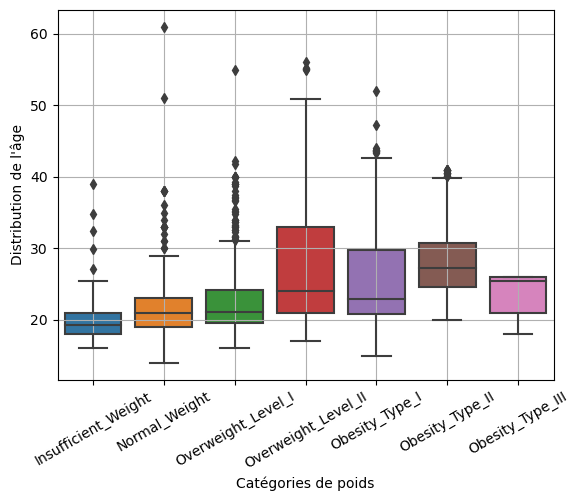

In [61]:
# L'analyse statistique révèle certaines hypothèses

# Explorer la relation entre
# la distribution de l'âge des répondant et
# les catégories de poids
sns.boxplot(data=data2, x='NObeyesdad', y='Age')
plt.xticks(rotation=30)
plt.xlabel("Catégories de poids")
plt.ylabel("Distribution de l'âge")
plt.grid()
plt.show();

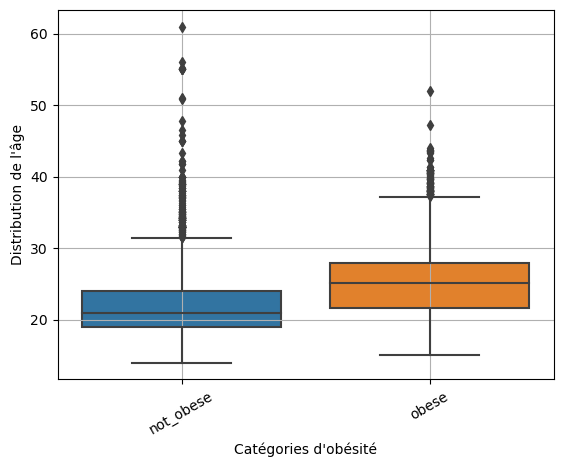

In [62]:
# On remarque une relation entre l'âge et le poids
# Il est normal que la médiane des individus augmente
# Même le minimum augmente avec l'âge
# Ils prennent du poids (surpoids ou Overweight)
# à mesure qu'il vieillissent et
# que leur métabolisme ralentit

# Par contre, la relation entre l'âge et l'obésité
# n'est pas aussi évidente

# Voyons une abstraction
# Les personnes en surpoids (ou Overweight) ne sont pas obèses
# Elles sont regroupées avec les personnes ayant un poids
# normal ou insuffisant
sns.boxplot(data=data2, x='NObeyesdad2', y='Age')
plt.xticks(rotation=30)
plt.xlabel("Catégories d'obésité")
plt.ylabel("Distribution de l'âge")
plt.grid()
plt.show();

[]

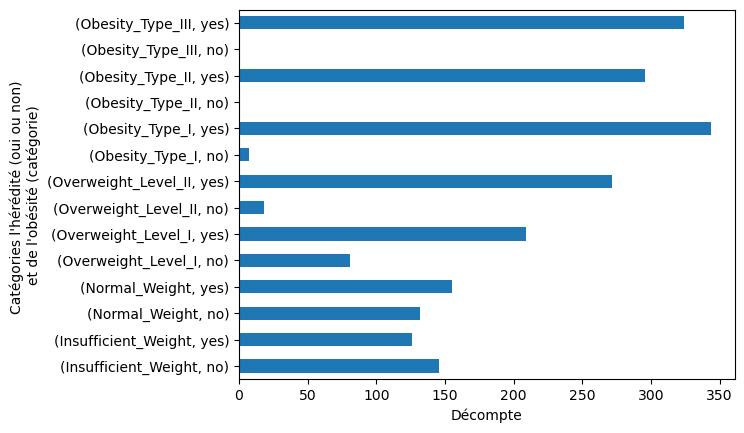

In [63]:
# À 2 catégories, cette relation entre l'âge et le poids
# devient plus claire

# Par contre, est-il normal qu'un individu devienne obèse
# peu importe son âge?

# Est-ce que l'âge est le seul facteur explicatif?

# Par exemple,
# est-ce que l'hérédité est un facteur qui explique le poids?
family_group: pd.Series \
    = data2.groupby(['NObeyesdad', 'FHWO'])['FHWO'].count()
# Series multiindex
# Consulter:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html?highlight=multiindex#pandas.MultiIndex

family_group.plot.barh()
plt.xlabel("Décompte")
plt.ylabel("Catégories l'hérédité (oui ou non) \net de l'obésité (catégorie)")
plt.plot()

In [64]:
# On pourrait continuer pour les autres features

# Par contre, l'algorithme de Random Forest peut
# trouver ces relations et les mesurer
# Il peut expliquer l'incidence des features sur l'obésité

In [65]:
# On a donc une cible (y) de catégories binaires
data2['NObeyesdad2'].cat.categories

Index(['not_obese', 'obese'], dtype='object')

In [66]:
data2['NObeyesdad_n2'].unique()

array([0, 1], dtype=int8)

In [67]:
# Ce qui permet de faire une classification binomiale
# avec les autres features (X)

#### Prétraitement

Les FA ne sont pas très sensibles à la non-normalisation ou non-standardisation des données. Or, il faudra comparer les FA avec d'autres modèle de classification. Donc, les données sont standardisées.

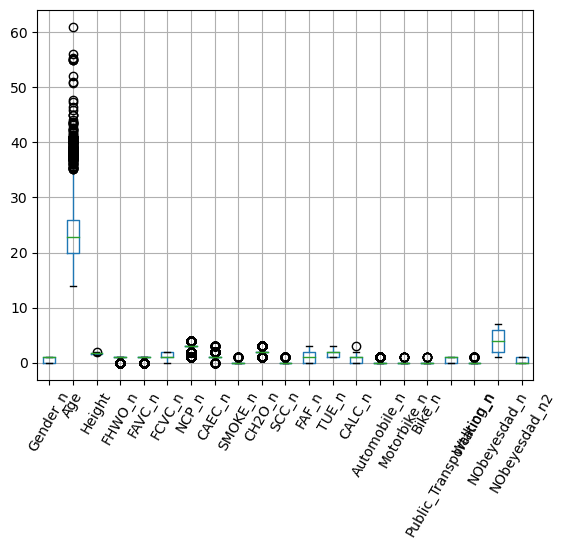

In [68]:
# Afficher les boites des features numériques
data2.boxplot(rot=60)
plt.show();

In [69]:
# Pour éviter qu'un feature, comme Age, ait plus d'influence
# qu'un autre feature, il faut normaliser ou standardiser les données

# Normaliser: chaque feature a la même moyenne ou médiane
# Standardiser: chaque feature a la même étendue (min à 0 et max à 1)

# Les histogrammes plus haut ont révélé que la majorité des features
# ne suivent pas la loi normale
# Ce sont des distributions plutôt uniformes
# Normaliser des données anormales n'est pas la solution

# Il faut standardiser les features numériques

from sklearn.preprocessing import MinMaxScaler

# Créer le scaler
min_max_scaler: sklearn.preprocessing \
    = MinMaxScaler(feature_range=(0, 1))

# Choisir les features numériques
cols: List[str] \
    = ['Gender_n', 'Age', 'Height', 'FHWO_n', 'FAVC_n', 'FCVC_n',
       'NCP_n', 'CAEC_n', 'SMOKE_n', 'CH2O_n', 'SCC_n', 'FAF_n',
       'TUE_n', 'CALC_n', 'Automobile_n', 'Motorbike_n', 'Bike_n',
       'Public_Transportation_n', 'Walking_n',
       'NObeyesdad_n', 'NObeyesdad_n2']

# Appliquer le scaler (donne un ndarray)
data3: pd.DataFrame \
    = min_max_scaler.fit_transform(data2[cols])

# Recréer un DataFrame avec le ndarray
data4: pd.DataFrame \
    = pd.DataFrame(data3, columns=cols)

data4.head(3)
type(min_max_scaler)

sklearn.preprocessing._data.MinMaxScaler

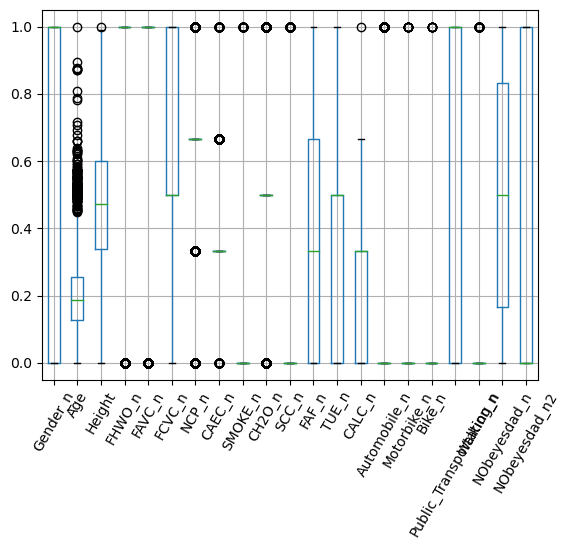

In [70]:
# Afficher les boites des features numériques
data4.boxplot(rot=60)
plt.show();

#### Préparation des jeux d'entrainement et de test

In [71]:
# Créer la matrice de features avec toutes les colonnes sauf les 2 dernières
data4.columns.values

array(['Gender_n', 'Age', 'Height', 'FHWO_n', 'FAVC_n', 'FCVC_n', 'NCP_n',
       'CAEC_n', 'SMOKE_n', 'CH2O_n', 'SCC_n', 'FAF_n', 'TUE_n', 'CALC_n',
       'Automobile_n', 'Motorbike_n', 'Bike_n', 'Public_Transportation_n',
       'Walking_n', 'NObeyesdad_n', 'NObeyesdad_n2'], dtype=object)

In [72]:
X: pd.DataFrame \
    = data4.iloc[:, :-2]

In [73]:
# Créer le vecteur cible avec la dernière colonne
y: pd.Series \
    = data4.iloc[:, -1]

In [74]:
# Le vecteur (ou Series) y est fait de catégories binaires: 0 et 1
y.head(3)

0    0.0
1    0.0
2    0.0
Name: NObeyesdad_n2, dtype: float16

In [75]:
# Vérifier la taille des objets
data4.shape, X.shape, y.shape

((2111, 21), (2111, 19), (2111,))

In [76]:
from sklearn.model_selection import train_test_split

# Scinder le jeu de données: 80/20
# random_state est expliqué plus loin...
X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.20,
                       random_state=0)

In [77]:
# Vérifier la taille des objets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1688, 19), (1688,), (423, 19), (423,))

### Modèle: prédiction et résolution (1 de 5)

#### Un modèle simple

In [78]:
# Tester les étapes du modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Créer l'algorithme du modèle
rfc: sklearn.ensemble \
    = RandomForestClassifier(n_estimators=10)

# Entrainer l'algorithme du modèle
rfc.fit(X_train, y_train)

# Prédire pour évaluer le modèle
rf_y_pred: np.ndarray \
    = rfc.predict(X_test)

# Calculer la justesse du modèle
rf_score: float \
    = accuracy_score(y_test, rf_y_pred)
print(f"Score de justesse (accuracy score): {round(rf_score, 3)}")

Score de justesse (accuracy score): 0.931


### Visualisation des résultats (1 de 5)

In [79]:
# Extraire un estimateur (un arbre de décision)
rfc.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1609317209)

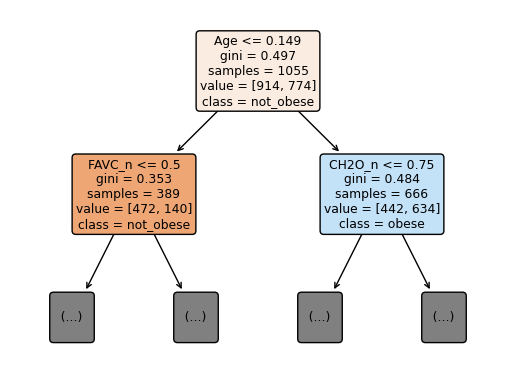

In [80]:
from sklearn.tree import plot_tree

# Visualiser un estimateur (un arbre de décision)
# Élaguer l'arbre
plot_tree(rfc.estimators_[0],
          max_depth=1,
          feature_names=X.columns,
          class_names=data2['NObeyesdad2'].unique(),
          filled=True,
          rounded=True)
plt.show();

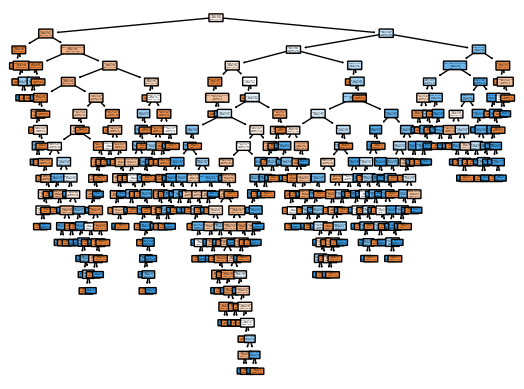

In [81]:
# On peut voir comment, dans chaque arbre de décision,
# l'algorithme scinde une branche avec le critère de Gini
# Consulter:
# https://datagy.io/sklearn-random-forests/

# Visualiser un estimateur complet
# (calcul long!)
plot_tree(rfc.estimators_[0],
          feature_names=X.columns,
          class_names=data2['NObeyesdad2'].unique(),
          filled=True,
          rounded=True)
plt.show();

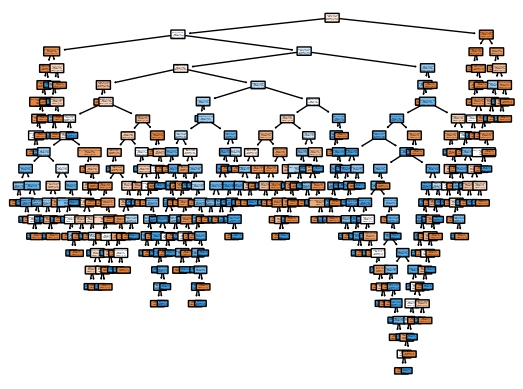

In [82]:
# Comparer avec une autre estimateur complet
# (calcul long!)
plot_tree(rfc.estimators_[5],
          feature_names=X.columns,
          class_names=data2['NObeyesdad2'].unique(),
          filled=True,
          rounded=True)
plt.show();

In [83]:
# Chaque estimateur, chaque arbre est unique
# C'est l'aspect aléatoire des FA
# Chaque estimateur n'est pas alimenté avec un jeu d'entrainement
# dans le même ordre; l'ordre change aléatoirement

### Modèle: prédiction et résolution (2 de 5)

#### Plusieurs scénarios

Le modèle des FA est très riche. On peut déterminer le nombre d'estimateurs (l'hyperparamètre principal). Chaque estimateur est un arbre de décision. Un modèle peut donc se baser sur 1, 10, 100, 500 arbres de décisions.

Cependant, le critère principal est de trouver un modèle suffisamment juste. Parmi tous les modèles possibles, le 2e critère, après la justesse, est de trouver un modèle qui requiert le moins de temps de calcul.

In [84]:
# Varier le nombre d'estimateurs (n_estimators)
# (calcul long!)
rf_scores: float \
    = []

for k in range(1, 200):
    rfc: sklearn.ensemble \
        = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    rf_y_pred: np.ndarray \
        = rfc.predict(X_test)
    rf_scores.append(accuracy_score(y_test, rf_y_pred))

In [85]:
# Extraire les scores de justesse
print(f"Scores de justesse (accuracy score):\n"
      f"{np.array(rf_scores).round(3)}")

Scores de justesse (accuracy score):
[0.827 0.887 0.898 0.922 0.896 0.939 0.924 0.927 0.931 0.936 0.929 0.927
 0.939 0.917 0.939 0.924 0.927 0.931 0.929 0.936 0.941 0.943 0.946 0.943
 0.946 0.946 0.934 0.936 0.939 0.943 0.934 0.941 0.943 0.936 0.934 0.943
 0.941 0.934 0.931 0.939 0.934 0.946 0.934 0.934 0.931 0.943 0.936 0.943
 0.934 0.934 0.941 0.939 0.946 0.941 0.95  0.941 0.941 0.941 0.943 0.934
 0.939 0.941 0.929 0.934 0.941 0.943 0.941 0.931 0.943 0.943 0.941 0.943
 0.943 0.948 0.943 0.948 0.934 0.939 0.943 0.943 0.939 0.941 0.943 0.934
 0.936 0.943 0.943 0.946 0.941 0.939 0.939 0.948 0.946 0.946 0.941 0.939
 0.936 0.939 0.941 0.948 0.941 0.946 0.934 0.946 0.95  0.936 0.941 0.941
 0.941 0.95  0.941 0.939 0.936 0.941 0.941 0.939 0.943 0.943 0.941 0.943
 0.936 0.939 0.946 0.948 0.939 0.943 0.939 0.943 0.936 0.939 0.943 0.943
 0.939 0.941 0.941 0.936 0.941 0.943 0.946 0.943 0.946 0.946 0.943 0.941
 0.943 0.939 0.939 0.955 0.941 0.943 0.936 0.941 0.939 0.941 0.941 0.941
 0.939 0.941 0

### Visualisation des résultats (2 de 5)

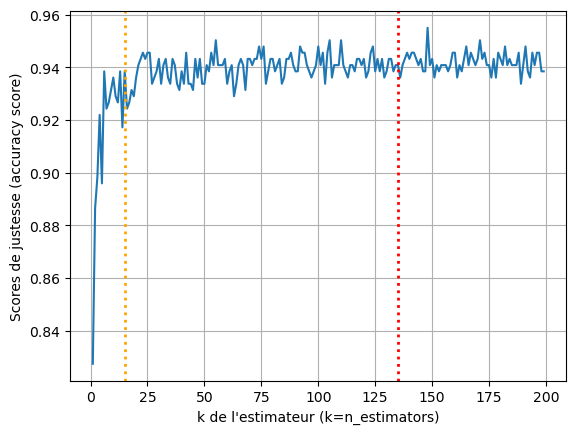

In [86]:
# Visualiser les scores de justesse
plt.plot(range(1, len(rf_scores)+1), rf_scores)
plt.xlabel("k de l'estimateur (k=n_estimators)")
plt.ylabel("Scores de justesse (accuracy score)")
plt.axvline(15, color='orange', linestyle='dotted', linewidth=2, label='k=15')
plt.axvline(135, color='red', linestyle='dotted', linewidth=2, label='k=135')
plt.grid()
plt.show();

In [87]:
# La justesse du modèle s'améliore rapidement entre 1 et 15 estimateurs,
# puis ralentit

# Autour de 15 estimateurs, la justesse plafonne, mais reste volatile d'un
# incrément à un autre

# Passé 135 estimateurs, la justesse se stabilise (moins de volatilité
# entre les incréments)

# 135 estimateurs semble un nombre optimal qui maximise la justesse et
# minimise le temps de calcul

### Modèle: optimisation (3 de 5)

Jouer sur le nombre d'estimateurs, c'est travailler sur l'hyperparamètres des FA (un paramètre externe à l'algorithme qui définit le genre d'algorithme).

Voici les principaux arguments de RandomForestClassifier() dans lequel se trouve des paramètres propres (ou internes) à l'algorithme:

- n_estimators=100: le nombre d'arbres de décision dans la forêt aléatoire
- criterion='gini': la fonction qui calcule qualité de la scission d'un embranchement (un noeud) dans chaque arbre
- max_depth=None: la taille maximale de chaque arbre (le profondeur des noeuds)
- min_samples_split=2: ...
- min_samples_leaf=1: ...
- min_weight_fraction_leaf=0.0: 
- max_features='auto': le nombre de feature à considérer lors de la scission d'un embranchement
- max_leaf_nodes=None: ...
- min_impurity_decrease=0.0: ...
- bootstrap=True: chaque arbre est créé avec un échantillon de tout le jeu de données d'entrainement; cet échantillon s'obtient avec une inférence statistique (bootstrap) avec les paramètres du jeu de données (moyenne, écart-type, etc.)
- oob_score=False: out-of-bag samples permet est une variante du bootstrap (équivalent à un tirage avec remise)
- n_jobs=None: ...
- random_state=None: lors du bootstrap, le tirage aléatoire suit une séquence de nombres pseudo-aléatoires (hasard contrôlé) afin de permettre une reproductibilité de l'expérience
- verbose=0: ajoute des détails aux résultats
- warm_start=False: ...
- class_weight=None: ...
- ccp_alpha=0.0: ...
- max_samples=None: lors du bootstrap, c'est le nombre maximal d'échantillons tiré au hasard (contrôlé)

Certains arguments sont importants pour leur influence sur un modèle: max_depth, max_features.

Restons sur l'ajustement de l'hyperparamètre.

In [88]:
# Estimer un scénario avec
# 135 estimateurs et
# la séquence pseudo-aléatoire 0
# Extraire les scores de justesse
rfc: sklearn.ensemble \
    = RandomForestClassifier(n_estimators=135,
                             random_state=0)

rfc.fit(X_train, y_train)

rf_y_pred: np.ndarray \
    = rfc.predict(X_test)

rf_scores: float \
    = accuracy_score(y_test, rf_y_pred)
print(f"Score de justesse (accuracy score): {round(rf_scores, 3)}")

Score de justesse (accuracy score): 0.943


### Visualisation des résultats (3 de 5)

In [89]:
# Calculer l'importance des features qui expliquent l'obésité
# en ordre décroissant
rf_feature_importance: pd.Series = pd.Series(rfc.feature_importances_,
                                             index=X.columns).sort_values(
                                             ascending=False)
print(f"Importance:\n{rf_feature_importance.round(3)}")

Importance:
Age                        0.203
Height                     0.161
FHWO_n                     0.111
NCP_n                      0.076
CAEC_n                     0.068
CALC_n                     0.053
FAF_n                      0.051
FAVC_n                     0.051
FCVC_n                     0.044
Gender_n                   0.043
CH2O_n                     0.041
TUE_n                      0.033
Public_Transportation_n    0.024
Automobile_n               0.019
SCC_n                      0.010
Walking_n                  0.006
SMOKE_n                    0.005
Motorbike_n                0.002
Bike_n                     0.000
dtype: float64


Les features avec le suffixe _n sont les équivalents numériques des features originaux

- Gender: Genre;
    - ['Female', 'Male'] équivaut  [0, 1]
- Age: Âge;
    - continue
- Height: Taille, en mètres;
    - continue
- Weight: Masse, en kilogrammes;
    - continue
- FHWO: Famille souffrant ou ayant souffert d'obésité;
    - ['no', 'yes'] équivaut à [0, 1]
- FAVC: Haute fréquence de consommation d'aliments hypercaloriques;
    - ['no', 'yes'] équivaut à [0, 1]
- FCVC: Consommation de légumes avec les repas;
    - ['never', 'sometimes', 'always'] équivaut à [0, 1, 2]
- NCP: Nombre quotidien de repas;
    - ['1', '2', '3', '4+'] équivaut à [1, 2, 3, 4]
- CAEC: Collations entre les repas; 
    - ['no', 'Sometimes', 'Frequently', 'Always'] équivaut à [0, 1, 2, 3]
- SMOKE: Tabagisme;
    - ['no', 'yes'] équivaut à [0, 1]
- CH2O: Consommation quotidienne d'eau;
    - ['less_than_a_liter', '1–2_liters', 'more_than_2_liters'] équivaut à [1, 2, 3]
- SCC: Surveillance de sa consommation calorique;
    - ['no', 'yes'] équivaut à [0, 1]
- FAF: Fréquence d'activités physiques;
    - ['none', '1_to_2_days', '2_to_4_days', '4_to_5_days'] équivaut à [0, 1, 2, 3]
- TUE: Temps quotidien d'utilisation d'appareils (mobile, jeux vidéo, TV, ordinateur, etc.);
    - ['0–2_hours', '3–5_hours', 'more_than_5_hours'] équivaut à [1, 2, 3]
- CALC: Consommation d'alcool;
    - ['no', 'Sometimes', 'Frequently', 'Always'] équivaut à [0, 1, 2, 3]
- MTRANS: Transport le plus utilisé;
    - ['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking'] équivaut aux features
    - Automobile_n
    - Motorbike_n
    - Bike_n
    - Public_Transportation_n
    - Walking_n, tous faits de [0, 1]
- NObeyesdad: Niveau d'obésité;
    - ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'] équivaut à [1, 2, 3, 4, 5, 6, 7]
- NObeyesdad2: Niveau d'obésité;
    - ['not_obese', 'obese'] équivaut à [0, 1]

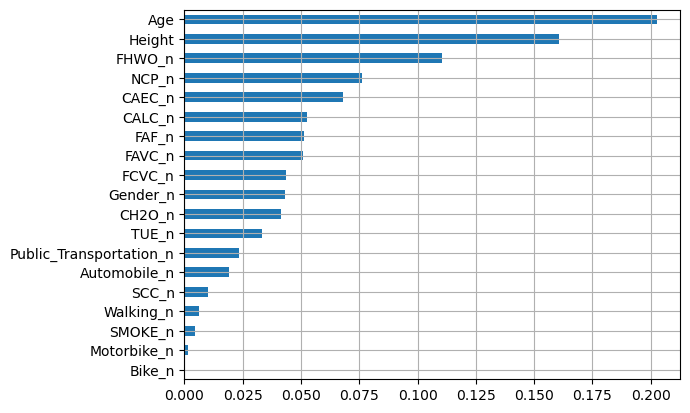

In [90]:
# Visualiser en ordre décroissant
rf_feature_importance.sort_values(ascending=True).plot.barh()
plt.grid()
plt.show();

In [91]:
# Extraire les 5 plus importantes features qui expliquent l'obésité
print(f"Importance (Top 5):\n{rf_feature_importance.iloc[:5].round(3)}")

Importance (Top 5):
Age       0.203
Height    0.161
FHWO_n    0.111
NCP_n     0.076
CAEC_n    0.068
dtype: float64


Les facteurs qui déterminent l'obésité sont:

- Age: Âge;
    - continue
    - En utilisant le modèle, prédiction démontrent que ce feature est très influent sur le résultat (0 ou 1); au point même où ce feature "écrase" les autres feature
- Height: Taille, en mètres;
    - continue
- FHWO: Famille souffrant ou ayant souffert d'obésité;
- NCP: Nombre quotidien de repas;
    - ['1', '2', '3', '4+'] équivaut à [1, 2, 3, 4]
- CAEC: Collations entre les repas; 
    - ['no', 'Sometimes', 'Frequently', 'Always'] équivaut à [0, 1, 2, 3]

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer la matrice de confusion
cm: np.ndarray \
    = confusion_matrix(y_test, rf_y_pred, labels=rfc.classes_)
cm

array([[221,  13],
       [ 11, 178]], dtype=int64)

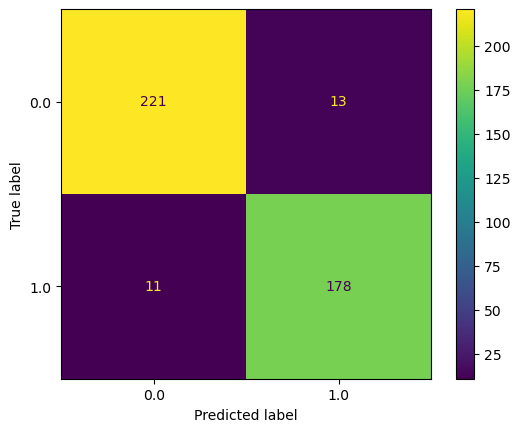

In [93]:
# La matrice montre les vrais positifs et négatifs sur la diagonale
# gauche-droite-haut-bas
# Consulter:
# https://fr.wikipedia.org/wiki/Matrice_de_confusion

# Visualiser la matrice de confusion
disp: sklearn.metrics \
    = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot()
plt.show();

In [94]:
# Un bon modèle maximise les vrais positifs et négatifs

from sklearn.metrics import classification_report

# C'est cette matrice qui permet de calculer la justesse et
# d'autres métriques

# Les métrique se résument à
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       234
         1.0       0.93      0.94      0.94       189

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [95]:
# On remarque la justesse
print(f"Score de justesse (accuracy score): {round(rf_scores, 2)}")

Score de justesse (accuracy score): 0.94


In [96]:
# La totalité des métriques et leurs définitions
# Consulter:
# https://scikit-learn.org/stable/modules/model_evaluation.html?highlight=precision+recall+f1
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html?highlight=auc

#### Sauvegarder le modèle

In [97]:
# Rappeler l'algorithme qui a été entrainé
rfc

RandomForestClassifier(n_estimators=135, random_state=0)

In [98]:
import joblib

# Créer le dossier modele avec le gestionnaire du PC

# Sauvegarder l'algorithme dans un fichier Pickle
joblib.dump(rfc, 'modele/modele_rf.pkl')

['modele/modele_rf.pkl']

In [99]:
# Rappeler le scaler qui a été utilisé
min_max_scaler

MinMaxScaler()

In [100]:
# Sauvegarder le scaler dans un fichier Pickle
joblib.dump(min_max_scaler, 'modele/scaler_rf.pkl')

['modele/scaler_rf.pkl']

#### Importer le modèle

In [101]:
import joblib

# Importer le modèle
modele_prediction: RandomForestClassifier \
    = joblib.load('modele/modele_rf.pkl')

In [102]:
# Importer des données
donnees: pd.DataFrame \
    = pd.read_excel("questionnaire.xlsx",
                    sheet_name="donnees",
                    skiprows=24,
                    decimal=',')
donnees

,Gender_n,Age,Height,FHWO_n,FAVC_n,FCVC_n,NCP_n,CAEC_n,SMOKE_n,CH2O_n,...,FAF_n,TUE_n,CALC_n,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n,Nobeyesdad_n,Nobeyesdad_n2
0,1,22,2,0,0,1,3,1,0,3,...,1,2,0,0,0,0,1,0,1,1


In [103]:
# Rectifier les 2 dernières colonnes
# (problème d'Excel qui convertit la 2e lettre en minuscule)
donnees2: pd.DataFrame = donnees.rename(columns={'Nobeyesdad_n': 'NObeyesdad_n',
                                                 'Nobeyesdad_n2': 'NObeyesdad_n2'})

# Le 2 derniers features sont uniquement pour le scaler
donnees2

,Gender_n,Age,Height,FHWO_n,FAVC_n,FCVC_n,NCP_n,CAEC_n,SMOKE_n,CH2O_n,...,FAF_n,TUE_n,CALC_n,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n,NObeyesdad_n,NObeyesdad_n2
0,1,22,2,0,0,1,3,1,0,3,...,1,2,0,0,0,0,1,0,1,1


In [104]:
# Importer le scaler
scaler: MinMaxScaler \
    = joblib.load('modele/scaler_rf.pkl')

In [105]:
# Examiner le scaler
scaler.scale_

array([1.     , 0.02127, 1.886  , 1.     , 1.     , 0.5    , 0.3333 ,
       0.3333 , 1.     , 0.5    , 1.     , 0.3333 , 0.5    , 0.3333 ,
       1.     , 1.     , 1.     , 1.     , 1.     , 0.1666 , 1.     ],
      dtype=float16)

In [106]:
# Valider que les données sont de la même taille que le scaler
assert len(donnees2.columns.values) == len(min_max_scaler.scale_)

In [107]:
# Appliquer le scaler
donnees3: np.ndarray \
    = scaler.transform(donnees2)
donnees3

array([[1.        , 0.17010498, 1.03710938, 0.        , 0.        ,
        0.5       , 0.66650391, 0.33325195, 0.        , 1.        ,
        0.        , 0.33325195, 0.5       , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

In [108]:
# Refaire le DataFrame
donnees4: pd.DataFrame \
    = pd.DataFrame(donnees3, columns=donnees2.columns)

donnees4

,Gender_n,Age,Height,FHWO_n,FAVC_n,FCVC_n,NCP_n,CAEC_n,SMOKE_n,CH2O_n,...,FAF_n,TUE_n,CALC_n,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n,NObeyesdad_n,NObeyesdad_n2
0,1.0,0.170105,1.037109,0.0,0.0,0.5,0.666504,0.333252,0.0,1.0,...,0.333252,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [109]:
# Retirer les 2 features bidons
donnees5: pd.DataFrame \
    = donnees4.drop(labels=['NObeyesdad_n', 'NObeyesdad_n2'], axis=1)
donnees5

,Gender_n,Age,Height,FHWO_n,FAVC_n,FCVC_n,NCP_n,CAEC_n,SMOKE_n,CH2O_n,SCC_n,FAF_n,TUE_n,CALC_n,Automobile_n,Motorbike_n,Bike_n,Public_Transportation_n,Walking_n
0,1.0,0.170105,1.037109,0.0,0.0,0.5,0.666504,0.333252,0.0,1.0,0.0,0.333252,0.5,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
# Faire la prédiction (AVEC les données standardisées par le scaler)
# avec le modèle et les données
modele_prediction.predict(donnees5)

array([0.], dtype=float16)

In [111]:
# C'est cette dernière séquence à partir de
# import joblib
# qui est implanté dans la classe de rf_classification.py

### Modèle: comparaison (4 de 5)

On peut comparer les FA avec un arbre de décision simple.

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Créer l'algorithme du modèle
dtc: DecisionTreeClassifier \
    = DecisionTreeClassifier()

# Entrainer l'algorithme du modèle
dtc.fit(X_train, y_train)

# Prédire pour évaluer le modèle
dt_y_pred: np.ndarray = dtc.predict(X_test)

# Calculer la justesse du modèle
dt_score: float \
    = accuracy_score(y_test, dt_y_pred)
print(f"Score de justesse (accuracy score): {round(dt_score, 3)}")

Score de justesse (accuracy score): 0.887


### Visualisation des résultats (4 de 5)

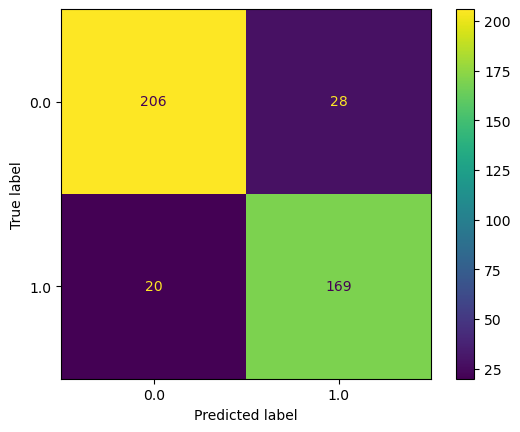

In [113]:
# Visualiser la matrice de confusion
cm: np.ndarray = confusion_matrix(y_test, dt_y_pred, labels=dtc.classes_)
disp: sklearn.metrics = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show();

In [114]:
# Résumer les métriques
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       234
         1.0       0.86      0.89      0.88       189

    accuracy                           0.89       423
   macro avg       0.88      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



In [115]:
# Ces résultats sont moins bons que ceux des FA à 135 estimateurs

### Modèle: comparaison (5 de 5)

On peut comparer les FA avec un Support Vector Classification.

In [116]:
from sklearn.svm import SVC

# Créer l'algorithme du modèle
svc: SVC = SVC()

# Entrainer l'algorithme du modèle
svc.fit(X_train, y_train)

# Prédire pour évaluer le modèle
svc_y_pred: np.ndarray = svc.predict(X_test)

# Calculer la justesse du modèle
svc_score: float \
    = accuracy_score(y_test, svc_y_pred)
print(f"Score de justesse (accuracy score): {round(svc_score, 3)}")

Score de justesse (accuracy score): 0.858


### Visualisation des résultats (5 de 5)

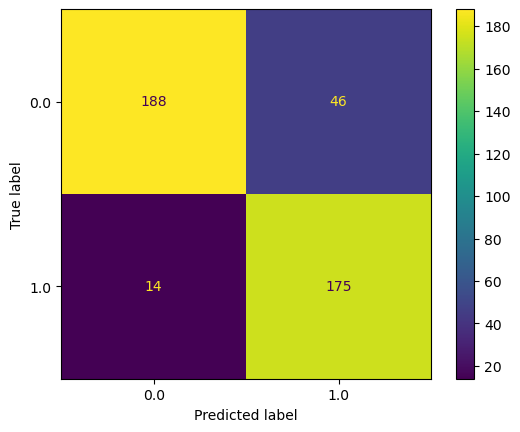

In [117]:
# Visualiser la matrice de confusion
cm: np.ndarray \
    = confusion_matrix(y_test, svc_y_pred, labels=svc.classes_)
disp: sklearn.metrics \
    = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot()
plt.show();

In [118]:
# Résumer les métriques
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       234
         1.0       0.79      0.93      0.85       189

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.87      0.86      0.86       423



In [119]:
# Ces résultats sont moins bons que ceux des FA à 135 estimateurs

### Hypothèses (2 de 2)

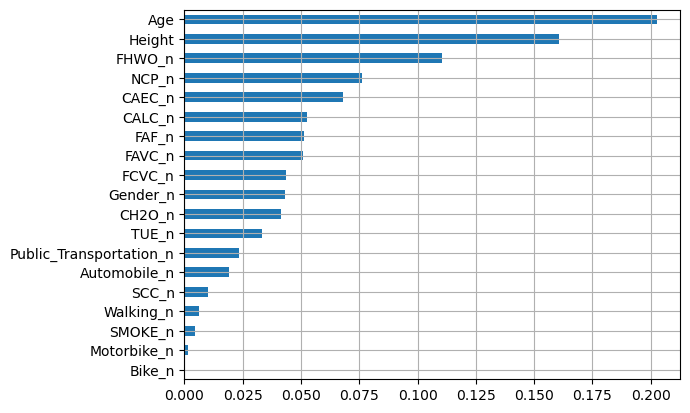

In [120]:
# Les résultats montre l'ordre des features d'importance...
rf_feature_importance.sort_values(ascending=True).plot.barh()
plt.grid()
plt.show();

In [121]:
# ...dont les 5 plus important features
print(f"Importance (Top 5):\n{rf_feature_importance.iloc[:5].round(3)}")

Importance (Top 5):
Age       0.203
Height    0.161
FHWO_n    0.111
NCP_n     0.076
CAEC_n    0.068
dtype: float64


Les facteurs qui déterminent l'obésité sont:

- Age: Âge;
    - continue
    - En utilisant le modèle, prédiction démontrent que ce feature est très influent sur le résultat (0 ou 1); au point même où ce feature "écrase" les autres feature
- Height: Taille, en mètres;
    - continue
- FHWO: Famille souffrant ou ayant souffert d'obésité;
- NCP: Nombre quotidien de repas;
    - ['1', '2', '3', '4+'] équivaut à [1, 2, 3, 4]
- CAEC: Collations entre les repas; 
    - ['no', 'Sometimes', 'Frequently', 'Always'] équivaut à [0, 1, 2, 3]

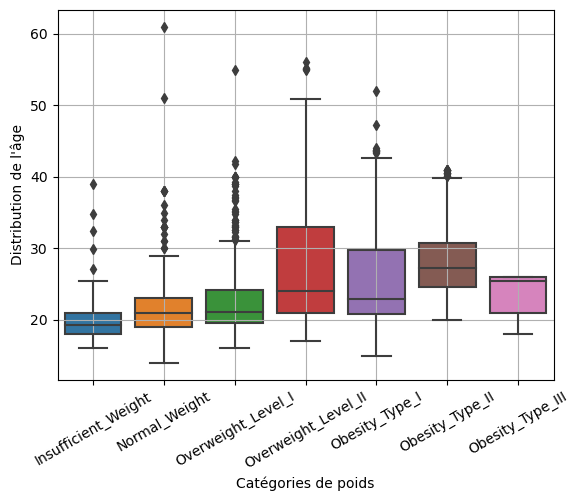

In [122]:
# L'analyse statistique révèlait certaines hypothèses
# de départ qui ont été vérifiées par les résultats

# Le 1er feature d'importance est l'âge

# Une certaine relation positive entre l'âge et
# catégories de poids
sns.boxplot(data=data2, x='NObeyesdad', y='Age')
plt.xticks(rotation=30)
plt.xlabel("Catégories de poids")
plt.ylabel("Distribution de l'âge")
plt.grid()
plt.show();

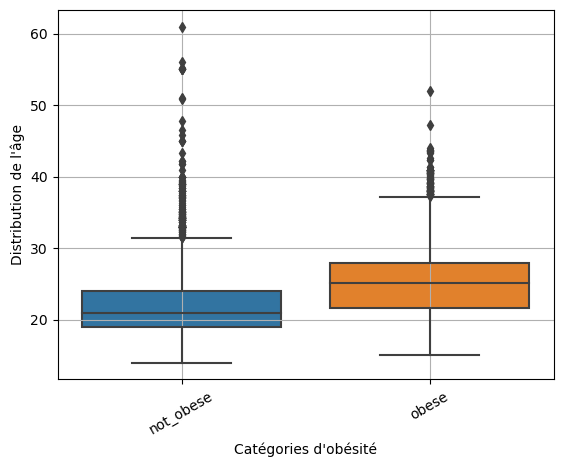

In [123]:
# Une relation positive entre l'âge et l'obésité
# l'obésité représente 3 des catégories ci-dessus
sns.boxplot(data=data2, x='NObeyesdad2', y='Age')
plt.xticks(rotation=30)
plt.xlabel("Catégories d'obésité")
plt.ylabel("Distribution de l'âge")
plt.grid()
plt.show();

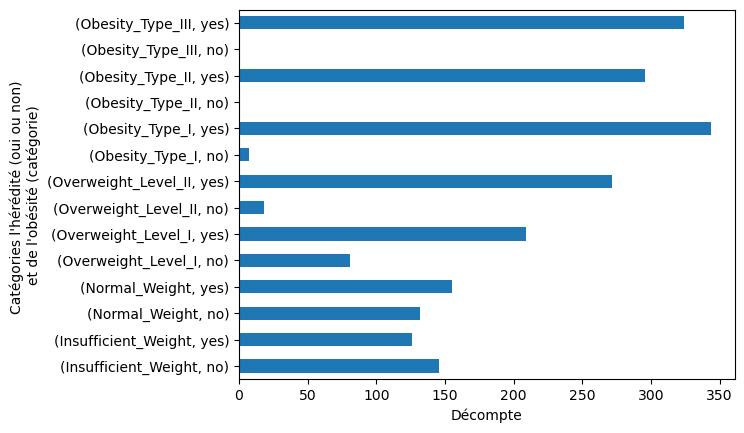

In [124]:
# Le 3e feature d'importance est FHWO
# FHWO: Famille souffrant ou ayant souffert d'obésité

# Une relation positive entre l'héridité et l'obésité
family_group: pd.Series \
    = data2.groupby(['NObeyesdad', 'FHWO'])['FHWO'].count()
family_group.plot.barh()
plt.xlabel("Décompte")
plt.ylabel("Catégories l'hérédité (oui ou non) \net de l'obésité (catégorie)")
plt.plot();

### Sur- ou de sous-apprentissage

Les FA sont considérées comme une méthode très précise et robuste en raison du nombre d'arbres de décision (n_estimators) participant au processus.

Le sous-apprentissage ou underfitting est souvent un cas de manque d'observations, peu importe l'algorithme utilisé. L'algorithme ne dispose pas assez de cas pour formuler des coefficients justes qui donneront de bonnes prévisions. Il faut soit alimenter le modèle avec plus d'observations pour mieux l'entrainer, soit recourir à des techniques d'inférence statistique (bootstrap) pour multiplier les observations. 

D'un autre côté, les FA ne souffrent pas du problème de sur-apprentissage ou overfitting (dont souffrent les autres algorithmes de classification comme la régression logistique et les arbres de décision). La raison principale est que les FA sont faits de plusieurs arbres de décision. D'où le nom générique de modèle d'ensemble. C'est comme une ensemble d'algorithmes. Même si certains arbres sont biaisés, la majorité des arbres converge vers une solution pour niveler les problèmes.

- Dans le cas d'une régression, chaque arbre de décision donne une réponse du genre 19.7, 19.8, 19.5, 20.1, etc. Les FA font le moyenne des réponses. Si quelques arbres sont biaisés, leur réponse sera diluée dans la moyenne.
- Dans le cas d'une classification, chaque arbre de décision donne une réponse du genre 1, 1, 0, 0, 1, etc. Les FA calculent le nombre de réponses majoritaires comme des votes (majorité de 0 ou de 1). Si quelques arbres sont biaisés, leur réponse sera diluée dans le vote.

Il est d'ailleurs possible de combiner des algorithmes (autres que les FA) dans un modèle d'ensemble où chaque algorithme a un vote (ou une pondération). On pourrait combiner diverses régressions logistiques et divers arbres de décisions pour prédire une classification. Chaque modèle se compare alors à chacun des arbres de décisions des FA. Au final, le modèle d'ensemble fait voter chaque modèle pour que la réponse majoritaire deviennent le résultat de la classification.

À noter que pour chaque arbre de décision des FA, le jeu de données d'entrainement (X_train, y_train ou X, y si le jeu de données n'a pas été séparé comme dans le cas d'une validation croisée) est mélangé pour simplifier l'explication. Dans les détails, une inférence statistique refait le jeu de données d'entrainement (bootstrap). Donc, chaque arbre de décision ne reçoit pas les observations (les rangées de données) dans le même ordre que l'arbre précédent et que l'arbre suivant. Ce qui permet donne un arbre de décision différent. On peut visualiser cette différence en comparant les arbres de décision de quelques estimateurs (voir plus haut). Avec divers arbres de décision, les réponses divergents, mais les FA convergent vers une réponse moyenne ou majoritaire.

Faisons un comparatif.

Source: https://machinelearningmastery.com/overfitting-machine-learning-models/

In [125]:
# Varier le nombre d'estimateurs (n_estimators)
# un hyperparamètre des FA
# (calcul long!)
rf_scores_train: float \
    = []
rf_scores_test: float \
    = []

for k in range(1, 200):
    rfc: sklearn.ensemble \
        = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    
    # Prédire avec les données d'entrainement
    rf_y_pred_train: np.ndarray \
        = rfc.predict(X_train)
    # Calculer la justesse du modèle
    rf_scores_train.append(accuracy_score(y_train, rf_y_pred_train))
    
    # Prédire avec les données de test
    rf_y_pred: np.ndarray \
        = rfc.predict(X_test)
    # Calculer la justesse du modèle       
    rf_scores_test.append(accuracy_score(y_test, rf_y_pred))

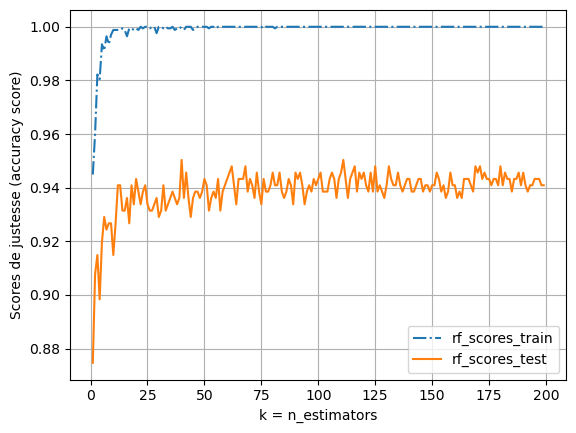

In [126]:
# Visualiser les scores de justesse
plt.plot(range(1, len(rf_scores_train)+1), rf_scores_train, '-.')
plt.plot(range(1, len(rf_scores_test)+1), rf_scores_test)
plt.xlabel("k = n_estimators")
plt.ylabel("Scores de justesse (accuracy score)")
plt.grid()
plt.legend(['rf_scores_train', 'rf_scores_test'])
plt.show();

In [127]:
# Le modèle est toujours meilleur pour prédire
# avec des données d'entrainement qu'à des données de test
# mais la différence est d'environ 6% quand k > 25
# Cette différence reste assez stable peu importe k

# Peut-on conclure à un problème de sur-apprentissage, car le modèle
# ne peut généraliser et être aussi juste avec les données de test
# qu'avec les données d'entrainement?

# Varier la profondeur (max_depth)
# un hyperparamètre des arbres de décision
rf_scores_train: float \
    = []
rf_scores_test: float \
    = []

for k in range(1, 20):
    dtc: DecisionTreeClassifier \
    = DecisionTreeClassifier(max_depth=k)
    dtc.fit(X_train, y_train)
    
    # Prédire avec les données d'entrainement
    rf_y_pred_train: np.ndarray \
        = dtc.predict(X_train)
    # Calculer la justesse du modèle
    rf_scores_train.append(accuracy_score(y_train, rf_y_pred_train))
    
    # Prédire avec les données de test
    rf_y_pred: np.ndarray \
        = dtc.predict(X_test)
    # Calculer la justesse du modèle       
    rf_scores_test.append(accuracy_score(y_test, rf_y_pred))

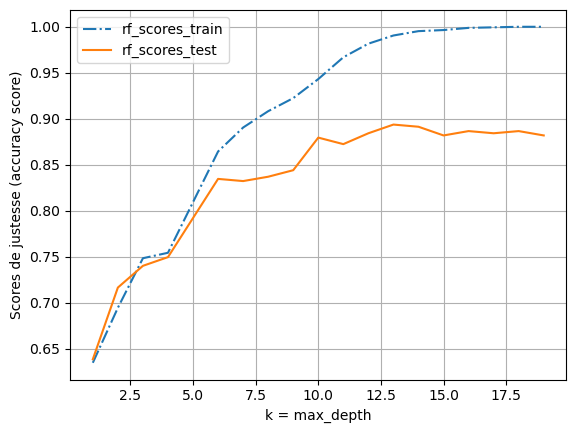

In [128]:
# Visualiser les scores de justesse
plt.plot(range(1, len(rf_scores_train)+1), rf_scores_train, '-.')
plt.plot(range(1, len(rf_scores_test)+1), rf_scores_test)
plt.xlabel("k = max_depth")
plt.ylabel("Scores de justesse (accuracy score)")
plt.grid()
plt.legend(['rf_scores_train', 'rf_scores_test'])
plt.show();

In [129]:
# Ici, autre son de cloche
# La différence quasi-nulle change à k=5
# Elle ne fait qu'augmenter en fonction de k

# Le modèle reste meilleur pour prédire
# avec des données d'entrainement qu'avec des données de test
# mais la différence est de plus de 10% quand k > 11

# C'est un vrai problème de sur-apprentissage, car le modèle
# ne peut généraliser et être aussi juste avec les données de test
# qu'avec les données d'entrainement

# Les FA "règle le problème" du sur-apprentissage (de l'arbre de décision),
# car les FA sont un ensemble d'arbres de décision

## Mise en production

Voir les fichier rf_classification.py et main.py alimenté par questionnaire.xlsx

L’interface graphique (qui peut être une simple console) permettant de saisir les données à prédire et d’afficher la prédiction dans un fichier main.py le fichier Excel questionnaire.xlsx. Il suffit de changer les données de la colonne D dans la feuille donnees et de sauvegarder le fichier. Ces données seront importées lors de l'exécution de main.py pour faire une prédiction. Les colonnes E et au-delà sont des cas pouvant être copiés-collés dans la colonne D.